# **Teoría de comunicación y procesamiento de señales**

# **Lab- proyecto #3**

**Elaborado por: Diana Cerdas Vargas y Sharon Vásquez Díaz**

**Profesor:**
              **Felipe Meza**


              
# Modulación de Ángulo


# Actividad # 1
A partir de las ecuaciones de señal modulada FM y PM, obtenga las curvas que describen
el comportamiento de un sistema básico de modulación de ángulo. Para la señal
moduladora puede usar una señal de tono continua clásica, esto es, un seno o un coseno
como por ejemplo $ 𝑚(𝑡) = 𝐴_m cos(2πf_mt)$.
Debe desplegar las siguientes curvas: m(t), m’(t), c(t) y s(t) tanto para FM como para PM, para un total de 5 gráficas, similar a como se despliegan en la lámina 9 de la presentación de “Modulación de Angulo”. Los valores de las diferentes variables debe ajustarlos para que las gráficas anteriores permitan
apreciar correctamente el comportamiento de ambos tipos de modulación. Recuerde que
debe explicar adecuadamente en la notebook todas las elecciones y criterios que lleve cabo. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

#Solución
Elección de parámetros y definición de señales:

* Se definieron los parámetros necesarios para las señales moduladora y portadora, incluyendo amplitudes, frecuencias y tiempos de muestreo.
* La señal moduladora m(t) es una señal de tono coseno clásica con una frecuencia de 2 Hz y una amplitud de 1.
Se ha calculado la derivada de la señal moduladora m′(t) utilizando la función np.gradient() para obtener la tasa de cambio de la señal moduladora con respecto al tiempo.
* La señal portadora c(t) es una señal coseno pura con una frecuencia de 30 Hz y una amplitud de 1.

Modulación de fase (PM) y modulación de frecuencia (FM):
* Se definieron los valores de $K_p$ y $k_f$ para la modulación de fase y la modulación de frecuencia, respectivamente.
* Luego se calculan las señales moduladas por PM y FM, utilizando las fórmulas de modulación correspondientes.

Gráficas:

* Finalmente, se han creado subgráficas para mostrar cada señal por separado, incluyendo la señal moduladora, la señal moduladora derivada, la señal portadora y las señales moduladas PM y FM.



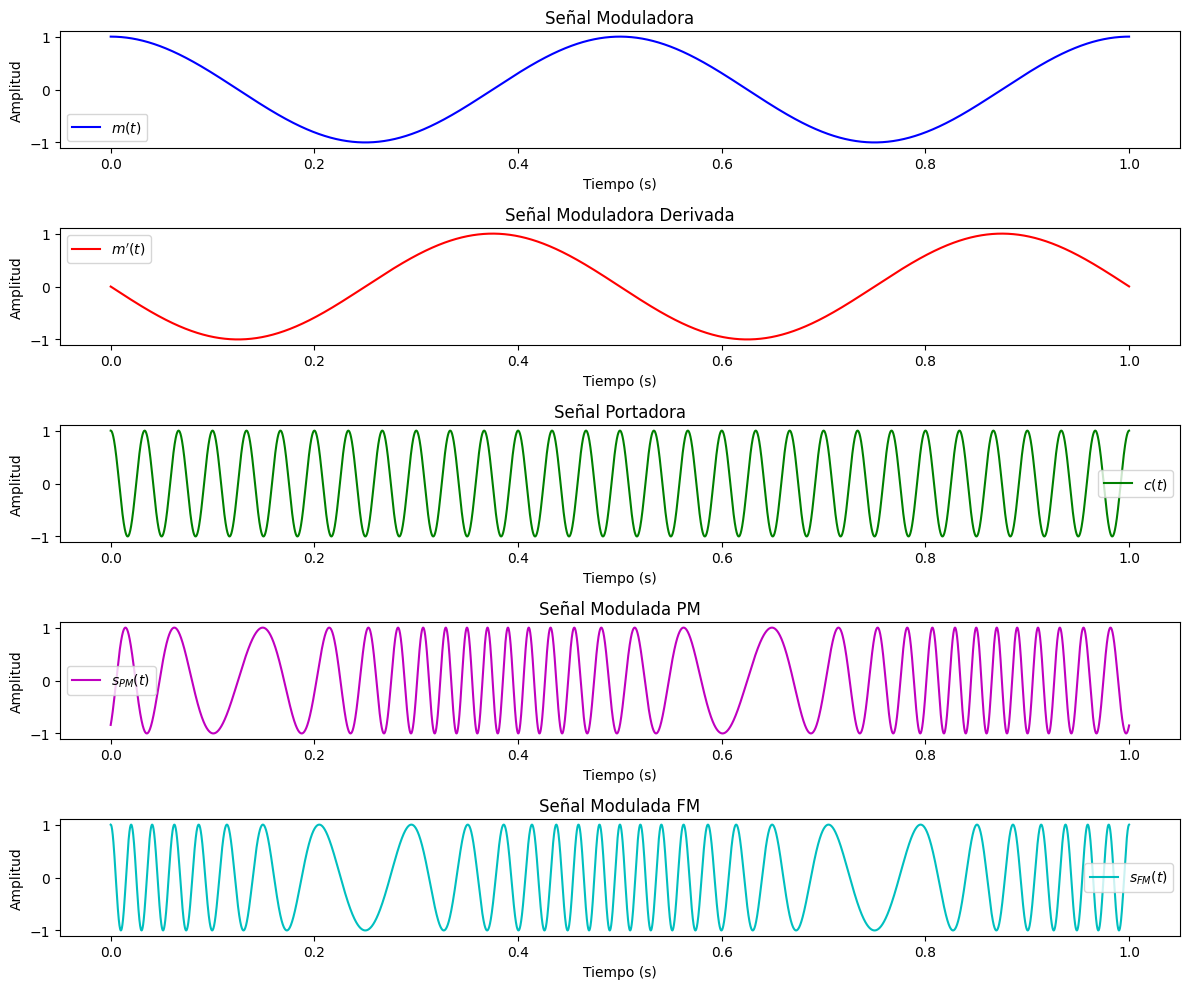

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Definición de parámetros
Ts = 0.0001  # Tiempo de muestreo
fs = 1 / Ts  # Frecuencia de muestreo
t = np.arange(0, 1, Ts)  # Vector de tiempo

# Señal moduladora (tono)
fm = 2  # Frecuencia de la señal de tono (Hz)
Am = 1  # Amplitud de la señal de tono
mt = Am * np.cos(2 * np.pi * fm * t)  # Señal de tono

# Derivada de la señal moduladora
mtp = np.gradient(mt, Ts)  # Derivada de la señal de tono
mtp = mtp / np.max(np.abs(mtp))  # Normalización de la señal derivada

# Señal portadora
fc = 30  # Frecuencia de la señal portadora (Hz)
Ac = 1  # Amplitud de la señal portadora
ct = Ac * np.cos(2 * np.pi * fc * t)  # Señal portadora

# Señal modulada PM
kp = 10  # Índice de modulación de fase
SPM = Ac * np.cos(2 * np.pi * fc * t + kp * mt)  # Señal modulada PM

# Señal modulada FM
kf = 20  # Índice de modulación de frecuencia
SFM = Ac * np.cos(2 * np.pi * fc * t + 2 * np.pi * kf * sp.integrate.cumulative_trapezoid(mt, t, initial=0))  # Señal modulada FM

# Gráficos
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, mt, 'b', label='$m(t)$')
plt.title('Señal Moduladora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, mtp, 'r', label='$m\'(t)$')
plt.title('Señal Moduladora Derivada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, ct, 'g', label='$c(t)$')
plt.title('Señal Portadora')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, SPM, 'm', label='$s_{PM}(t)$')
plt.title('Señal Modulada PM')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, SFM, 'c', label='$s_{FM}(t)$')
plt.title('Señal Modulada FM')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()

# Análisis de resultados:

* Señal Moduladora: La señal moduladora $m(t)$ es una señal de tono coseno clásica con una frecuencia de 2 Hz y una amplitud de 1. Tiene un período de 0.5 segundos y representa la señal de entrada al sistema de modulación.

* Señal Moduladora Derivada: La señal $m′(t)$ es la derivada de la señal moduladora y representa la tasa de cambio de la señal moduladora con respecto al tiempo. Se ha normalizado para que mantenga el valor de su amplitud unitaria.

* Señal Portadora: La señal portadora $c(t)$ es una señal coseno pura con una frecuencia de 30 Hz y una amplitud de 1. Representa la portadora sin modular.

* Señal Modulada PM: La señal modulada PM (t) es el resultado de modular la señal portadora con la señal moduladora mediante modulación de fase. El índice de modulación de fase es $k_p=10$, lo que provoca una variación de fase proporcional a la señal moduladora.

* Señal Modulada FM: La señal modulada
FM (t) es el resultado de modular la señal portadora con la señal moduladora mediante modulación de frecuencia. El índice de modulación de frecuencia es  $k_f=20$, lo que provoca una variación de frecuencia proporcional a la integral de la señal moduladora.


Por lo tanto, aunque estas señales tienen un comportamiento similar entre sí, se encuentran desfasadas. Al observar la modulación PM, se puede notar que los puntos donde la frecuencia alcanza sus valores máximos y mínimos coinciden con los momentos en los que la amplitud de la señal de tono derivada alcanza sus extremos.

Este mismo comportamiento se puede observar al comparar la señal modulada en FM con la señal de tono original. Este patrón nos permite concluir que, tal y como se vio en clases, una señal modulada en FM puede interpretarse como una señal en PM con la señal de tono integrada, y viceversa: una señal modulada en PM puede entenderse como una señal en FM con la señal de tono derivada.

# Actividad # 2
1- Construya un sistema de comunicación modulador FM de tipo NBFM. Elija y justifique los valores apropiados de las distintas variables que permitan observar el comportamiento esperado de ambos métodos.
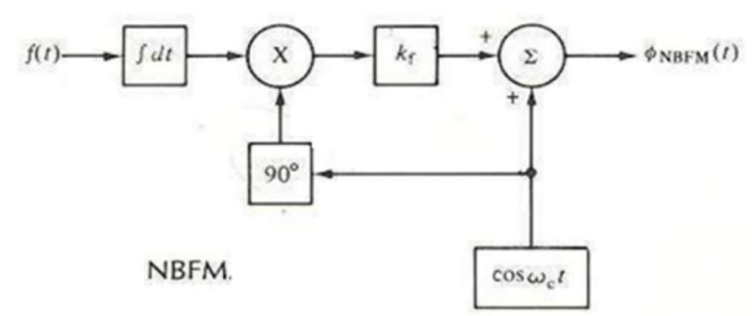


2- Verifique las señales moduladas obtenidas tanto en el tiempo como en la frecuencia, explique los resultados obtenidos.


3- Para el caso del modulador NBFM, seleccione al menos dos valores de beta, uno donde se aprecie que existe modulación de amplitud residual, y otro valor de beta donde se mantengan los criterios de NBFM/PM, pero que NO se presente modulación en amplitud residual, justifique ambos valores de beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

#Solución


#Importación de liberías y función para graficar
Se importan las librerías necesarias para la solución del ejercicio.  
Además, se define la función para realizar las gráficas correspondientes, considerando que se van a realizar con diferentes colores para cada sección de la solución.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fft import fft, fftfreq

# Función para graficar en tiempo y frecuencia con colores diferentes
def plot_time_freq(x_data, y_data, x_label, y_label, title, x_lim, freq_lim, color_time, color_freq):
    """
    Grafica una señal en el dominio del tiempo y
    su transformada de Fourier en el dominio de la frecuencia.

    Parámetros:
    x_data: Datos de la variable independiente (tiempo).
    y_data: Datos de la variable dependiente (señal).
    x_label: Etiqueta del eje x.
    y_label: Etiqueta del eje y.
    title: Título de la gráfica.
    x_lim: Límite en el eje x para la gráfica en tiempo.
    freq_lim: Límite en el eje x para la gráfica en frecuencia.
    color_time: Color para la gráfica en tiempo.
    color_freq: Color para la gráfica en frecuencia.
    """

    N = len(y_data)
    y_fft = fft(y_data)
    x_fft = fftfreq(N, x_data[1] - x_data[0])
    x_fft = x_fft[:N]  # Se incluyen las frecuencias negativas
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Gráfica en el dominio del tiempo
    ax[0].plot(x_data, y_data, color=color_time)
    ax[0].set_xlabel(x_label, fontsize='14')
    ax[0].set_ylabel(y_label, fontsize='14')
    ax[0].set_title('Señal de ' + title, fontsize='16', fontweight="semibold")
    ax[0].set_xlim(0, x_lim)

    # Gráfica en el dominio de la frecuencia
    ax[1].plot(x_fft, 2.0 / N * np.abs(y_fft), color=color_freq)
    ax[1].set_xlabel('Frecuencia (Hz)', fontsize='14')
    ax[1].set_ylabel(y_label, fontsize='14')
    ax[1].set_title('Transformada de Fourier para Señal de ' + title, fontsize='16', fontweight="semibold")
    ax[1].set_xlim(-freq_lim, freq_lim)
    plt.tight_layout()
    plt.show()

# Señal moduladora (mensaje)
Se define la señal moduladora como una señal de tono, usada para caracterizar, de la siguiente forma:

> $m(t) = cos(2πf_{m}t)$

Definiendo $f_{m}$ con un valor de 10.

Seguidamente, se grafica la señal en el dominio del tiempo y la frecuencia. Sin embargo, también se requiere integrar esta señal, antes de multiplicarla con la señal portadora, por ello se realiza dicha integral y se muestran sus gráficas.


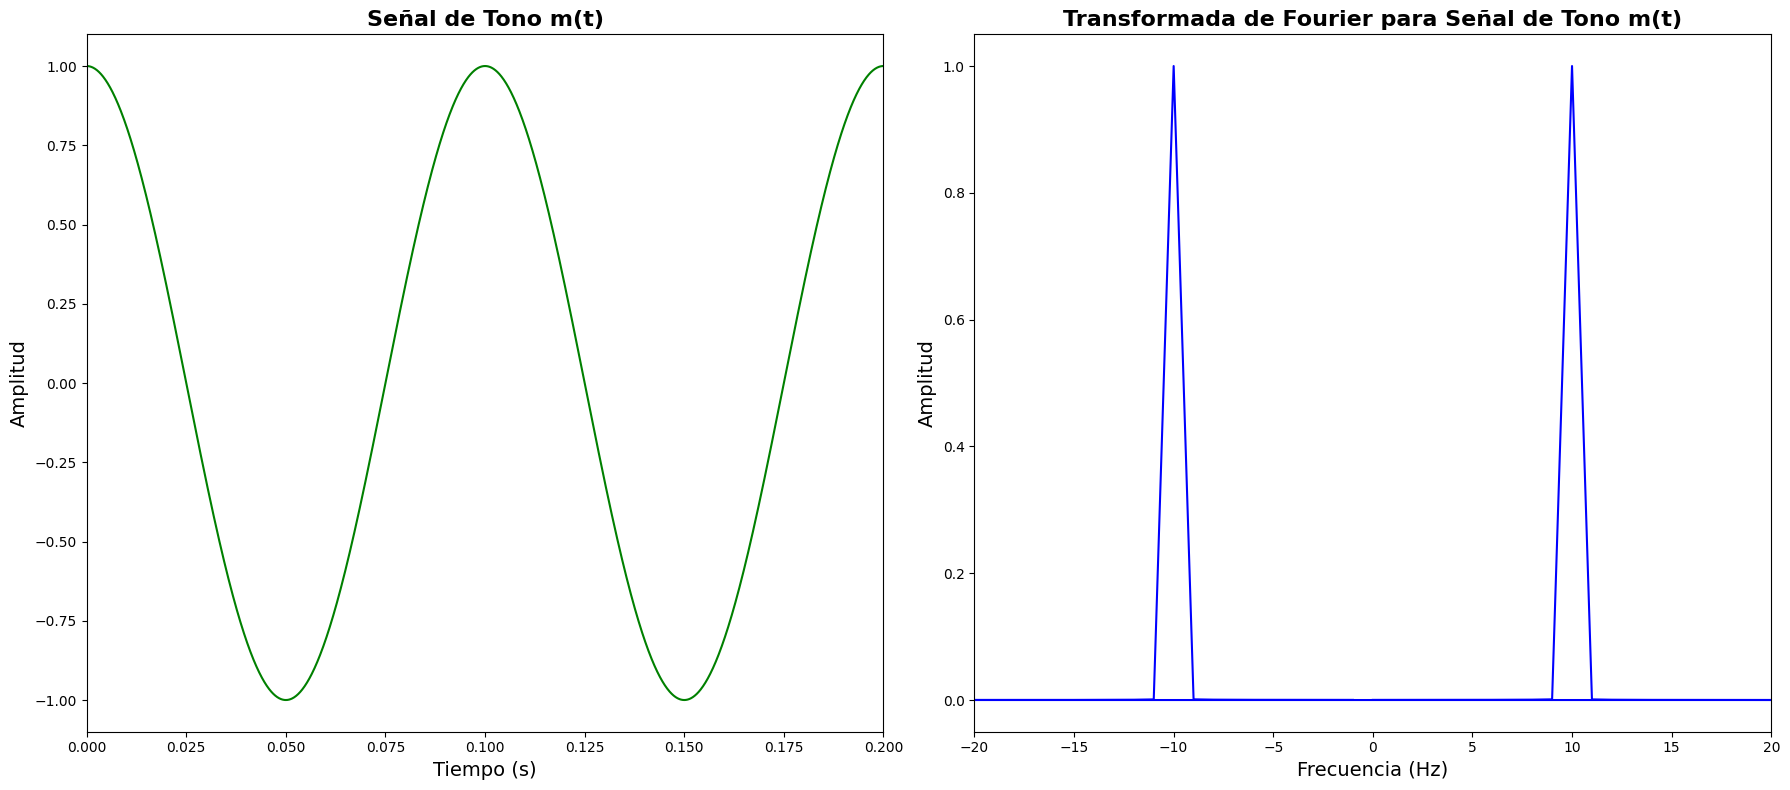

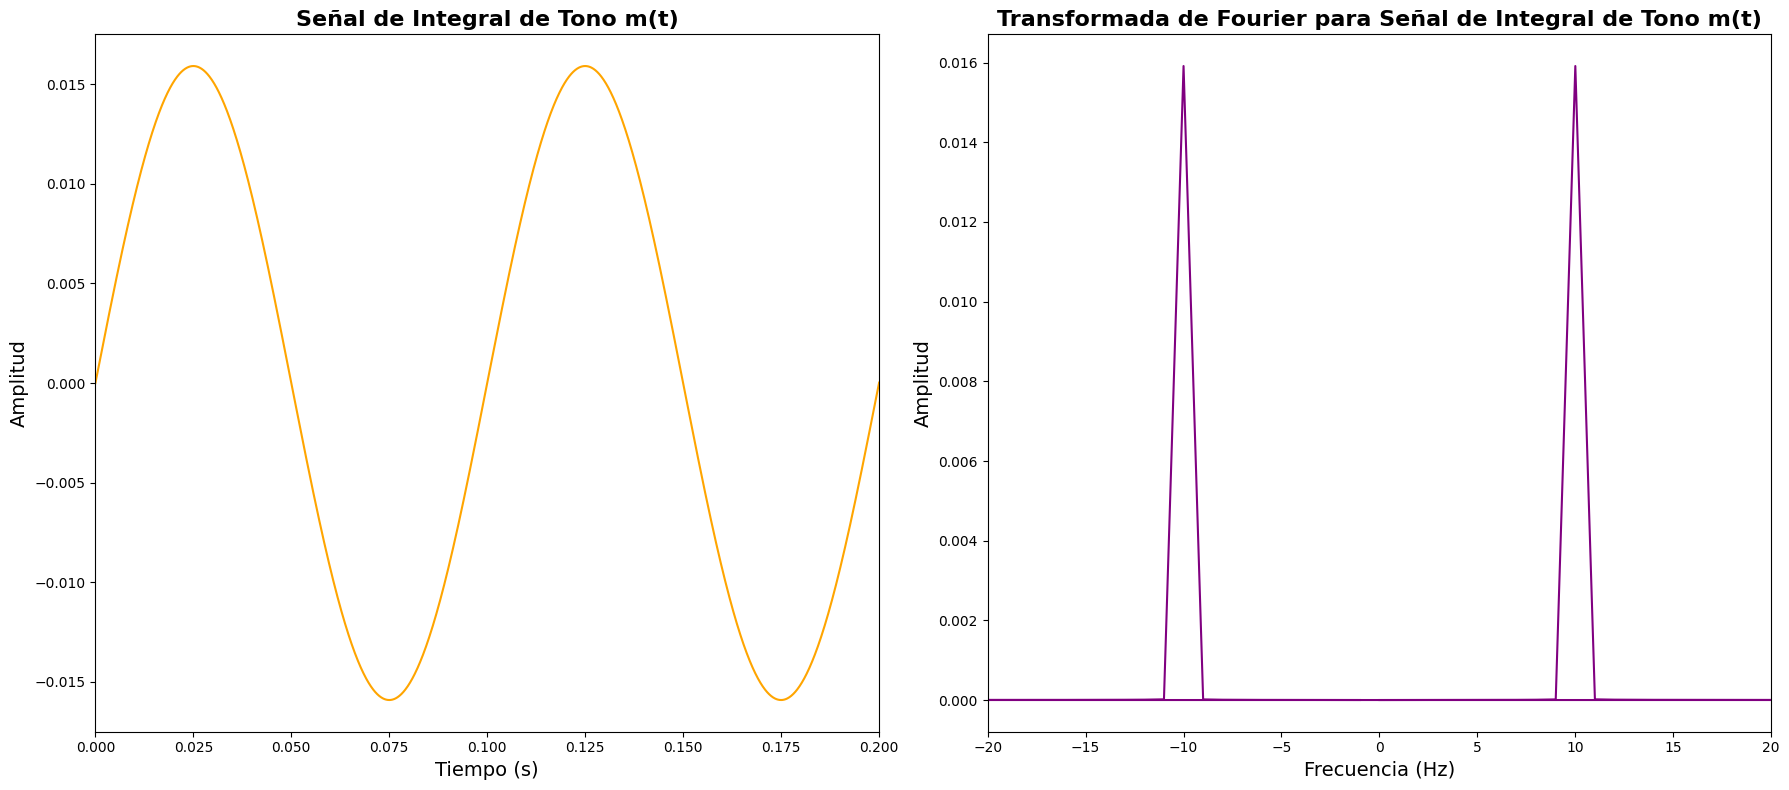

In [ ]:
# Definición de la señal moduladora (mensaje) y su gráfico en tiempo y frecuencia

Am = 1  # Amplitud de tono
fm = 10  # Frecuencia de la señal de tono (Hz)
wm = 2 * np.pi * fm  # Frecuencia angular de la señal (en radianes)

t_data = np.linspace(0, 1, 10000)

#Definición de la señal de tono
mt_data = Am * np.cos(wm * t_data)

# Gráfica de Señal de Tono / Mensaje
plot_time_freq(t_data, mt_data, 'Tiempo (s)', 'Amplitud', 'Tono m(t)', 0.2, 20, 'green', 'blue')

# Integración de la señal moduladora
mt_integrated_data = sp.integrate.cumulative_trapezoid(mt_data, t_data, initial=0)
 # Gráfica de Señal de Tono / Mensaje Integrada
plot_time_freq(t_data, mt_integrated_data, 'Tiempo (s)', 'Amplitud', 'Integral de Tono m(t)', 0.2, 20, 'orange', 'purple')

En las primeras dos gráficas se observa la señal del mensaje con su comportamiento normal, con una frecuencia de 10 Hz, y su comportamiento cosenoidal en el dominio del tiempo.

Sin embargo, al integrar la señal, se comporta como una señal senoidal, como es esperado, y con amplitud disminuida, pero la misma frecuencia.

#Señal portadora normal y desfasada
Ahora, definimos la señal portadora, la cual tiene la forma:

> $c(t) = cos(2πf_{c}t)$

En este caso, trabajamos con $f_{c}=100$ y realizamos las gráficas correspondientes.

Además, para este caso, es necesario realizar un desfase de la señal de 90°, tal y como se muestra en la imagen del enunciado, por ello, es necesario usar la siguiente propiedad:
> $cos(α+β) = cos(α)·cos(β)-sin(α)·sin(β)$

Por lo tanto, al ser un desfase equivalente a $Π/2$, se tiene que:
> $cos(2πf_{c}+π/2) = cos(2πf_{c})·cos(π/2)-sin(2πf_{c})·sin(π/2)$



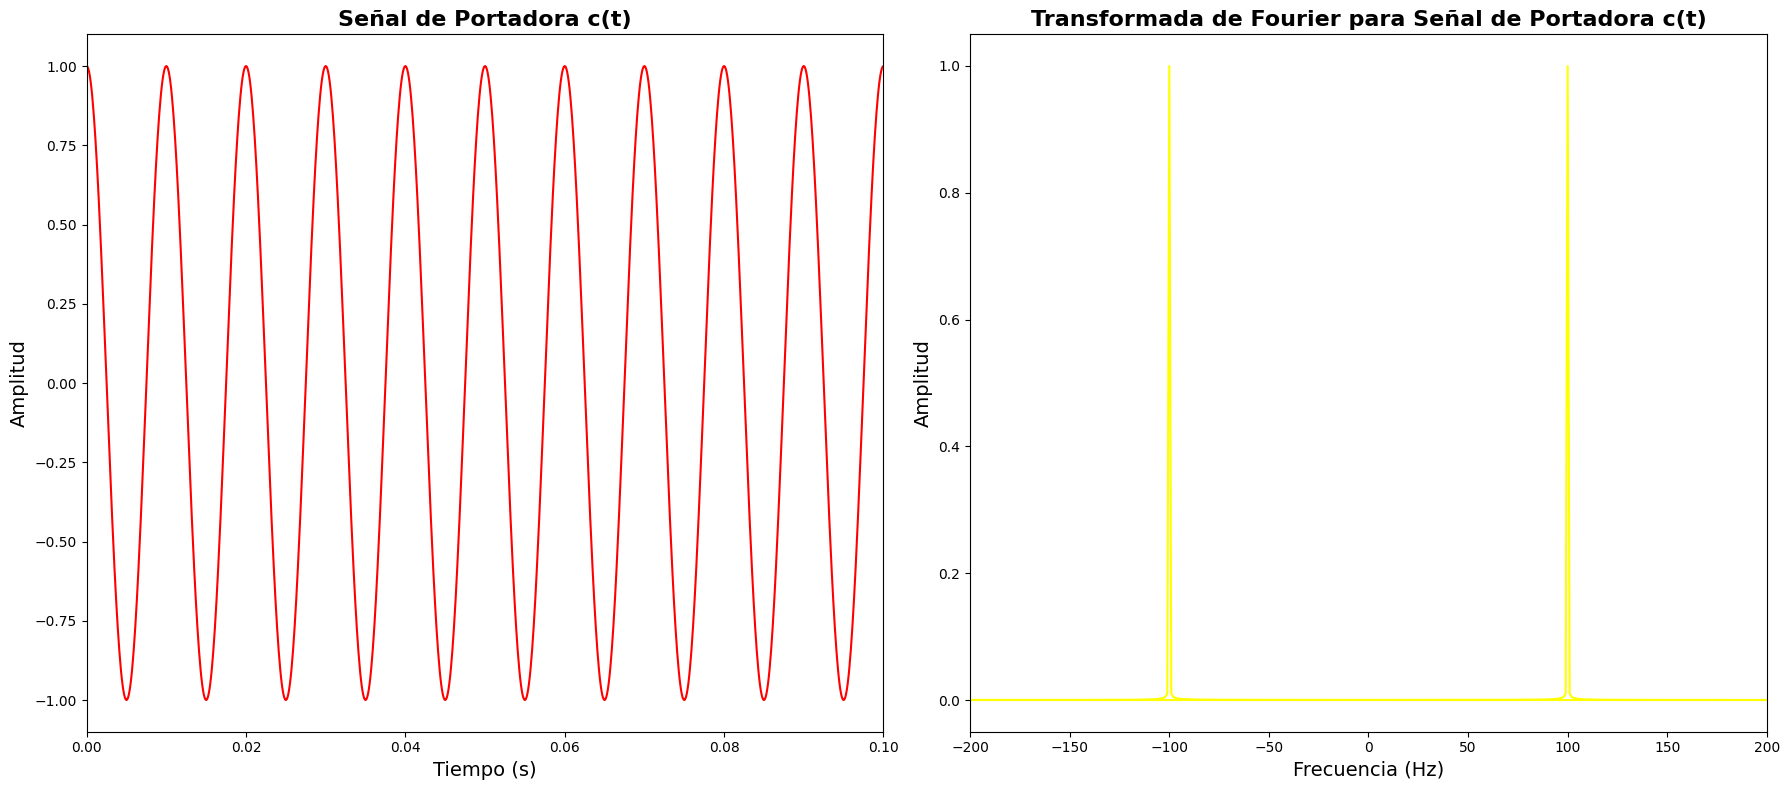

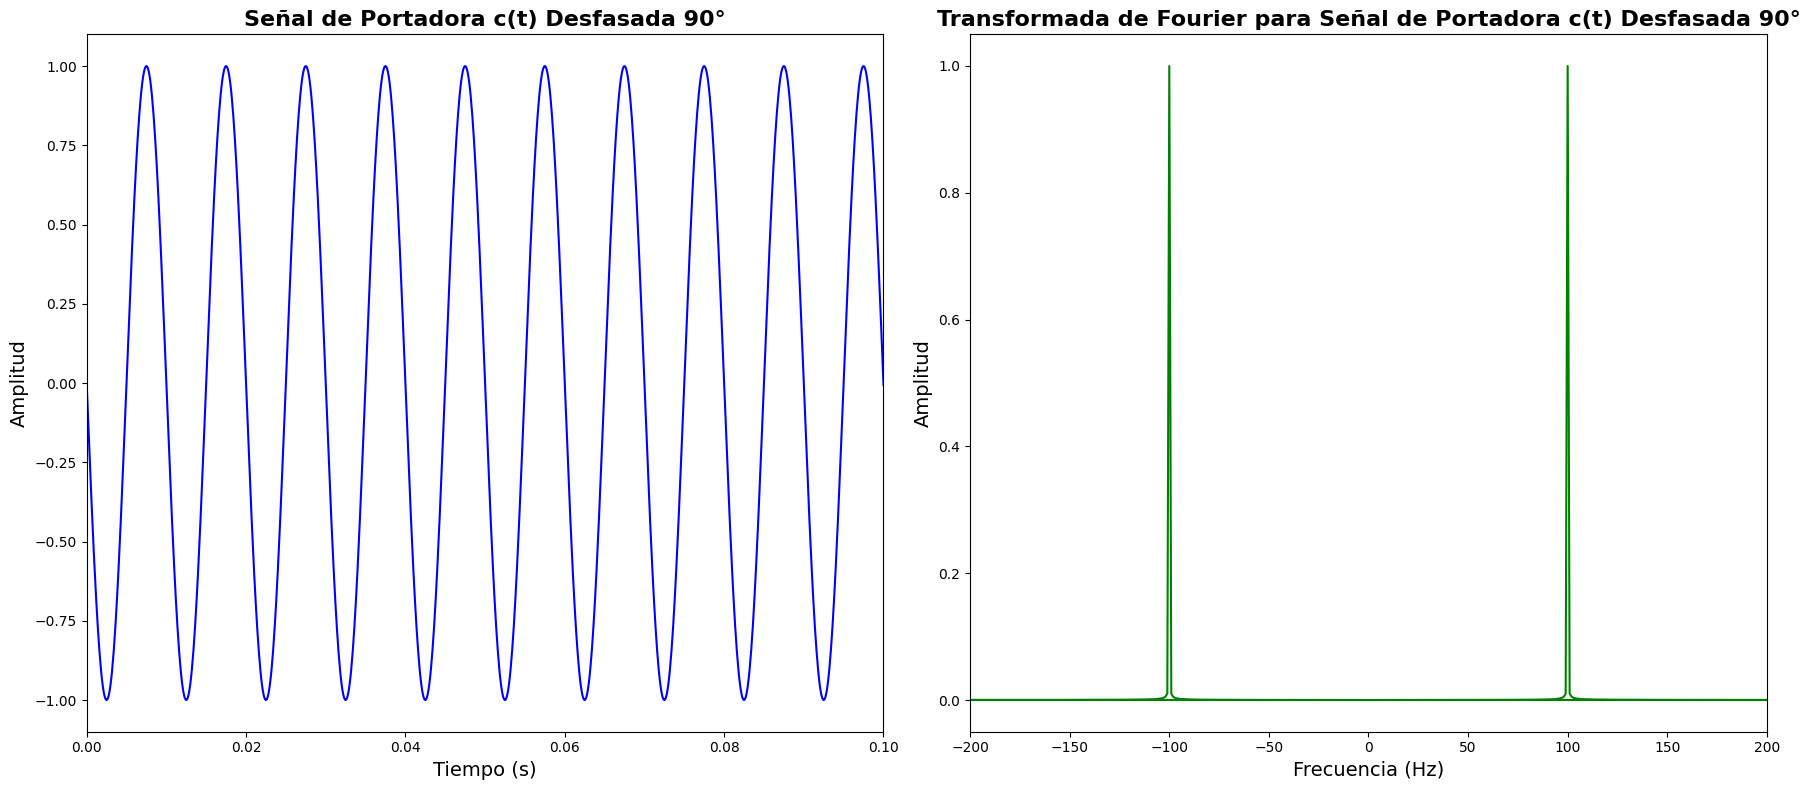

In [ ]:
# Definición de la señal portadora y su desfase de 90°

Ac = 1  # Amplitud de portadora
fc = 100  # Frecuencia de la señal portadora (Hz)
wc = 2 * np.pi * fc  # Frecuencia angular de la señal portadora (radianes)

#Creación de la señal portadora
ct_data = Ac * np.cos(wc * t_data)

#Creación de la señal portadora desfasada 90°
ct_shifted_90_data = (ct_data * np.cos(np.pi / 2) - np.sin(2 * np.pi * fc * t_data) * np.sin(np.pi / 2))

# Gráficas de las señales
plot_time_freq(t_data, ct_data, 'Tiempo (s)', 'Amplitud', 'Portadora c(t)', 0.1, 200, 'red', 'yellow')
plot_time_freq(t_data, ct_shifted_90_data, 'Tiempo (s)', 'Amplitud', 'Portadora c(t) Desfasada 90°', 0.1, 200, 'blue', 'green')

Cabe destacar que como se muestra en las gráficas el cambio de fase solo es notable en la gráfica en el dominio del tiempo, ya que la de la frecuencia permanece igual a la de la señal original.
Además, el hecho de realizar el desfase no genera ningún cambio en la amplitud de la señal.

#Multiplicación de las señales

Para esta sección, se realiza la multiplicación de la señal de tono integrada y la portadora ya desfasada 90°. Además, para mostrar el resultado se realizan sus gráficas tanto en el tiempo, como en la frecuencia.

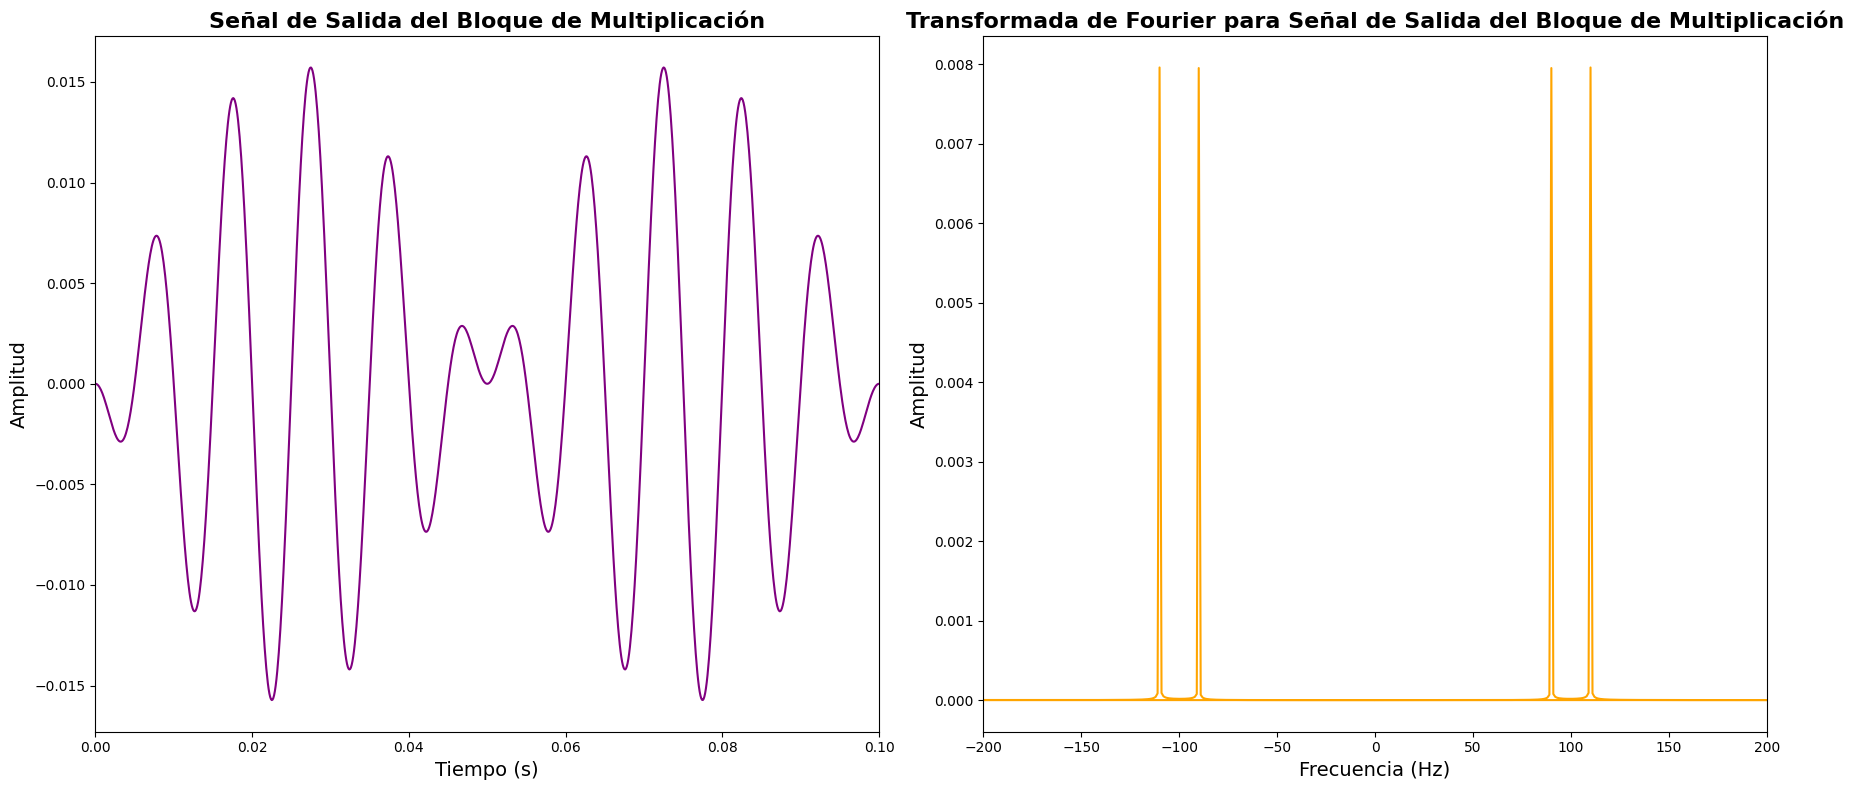

In [ ]:
# Multiplicación del mensaje integrado y la señal portadora desfasada
multiplied_block_data = mt_integrated_data * ct_shifted_90_data

#Gráficas en el dominio del tiempo y la frecuencia
plot_time_freq(t_data, multiplied_block_data, 'Tiempo (s)', 'Amplitud', 'Salida del Bloque de Multiplicación', 0.1, 200, 'purple', 'orange')

Esta multiplicación se realiza ya que como se vio en clases, para realizar este tipo de modulación se puede partir del diagrama de AM y adaptarlo al caso NBFM. Así que al multiplicar las señales indicadas, se observan en el dominio del tiempo las envolventes, que son similares a cuando se realiza el proceso de modulación por AM. Sin embargo, es importante destacar que en este caso, la envolvente contiene una *modulación en amplitud residual*, que es variable con el tiempo.

Para el caso de la frecuencia, también se tiene un comportamiento similar al de AM, ya que la frecuencia de la señal portadora es suprimida y se tienen las frecuencias negativas y positivas, centradas en la frecuencia de señal carrier, distanciadas por el valor de la frecuencia de la señal moduladora (10 Hz).

#Caso Sin Amplitud Residual

Para determinar el primer valor de beta, de forma que no se tenga modulación de amplitud residual, es necesario contemplar que para evitar los efectos como la amplitud residual se requiere restringir el valor de beta (*índice de modulación*) por:

> $β=Δf/f_{m}  ≪ 0.3$ $rad$


Donde $Δf$ corresponde a la desviación de frecuencia, y está dada por:
> $Δf= k_{f}A_{m}$

En dicha ecuación se tiene el factor de la sensibilidad de frecuencia, que es determinada por la ganancia $k_{f}$, por lo tanto, para cumplir con dicho caso, se utilizará un valor de  $β= 0.03$, puesto que es un valor 10 veces menor al requerido, igual al utilizado en AM.

Para cumplir con dicho valor del índice de modulación se necesita que el valor de $K_f$ sea de 10, ya que previamente se definió el valor de la amplitud de la señal moduladara como 1 y su frecuencia ($f_m$) como 10 Hz.

Tras aplicar esto, es necesario graficar la señal obtenida luego de dicho proceso.

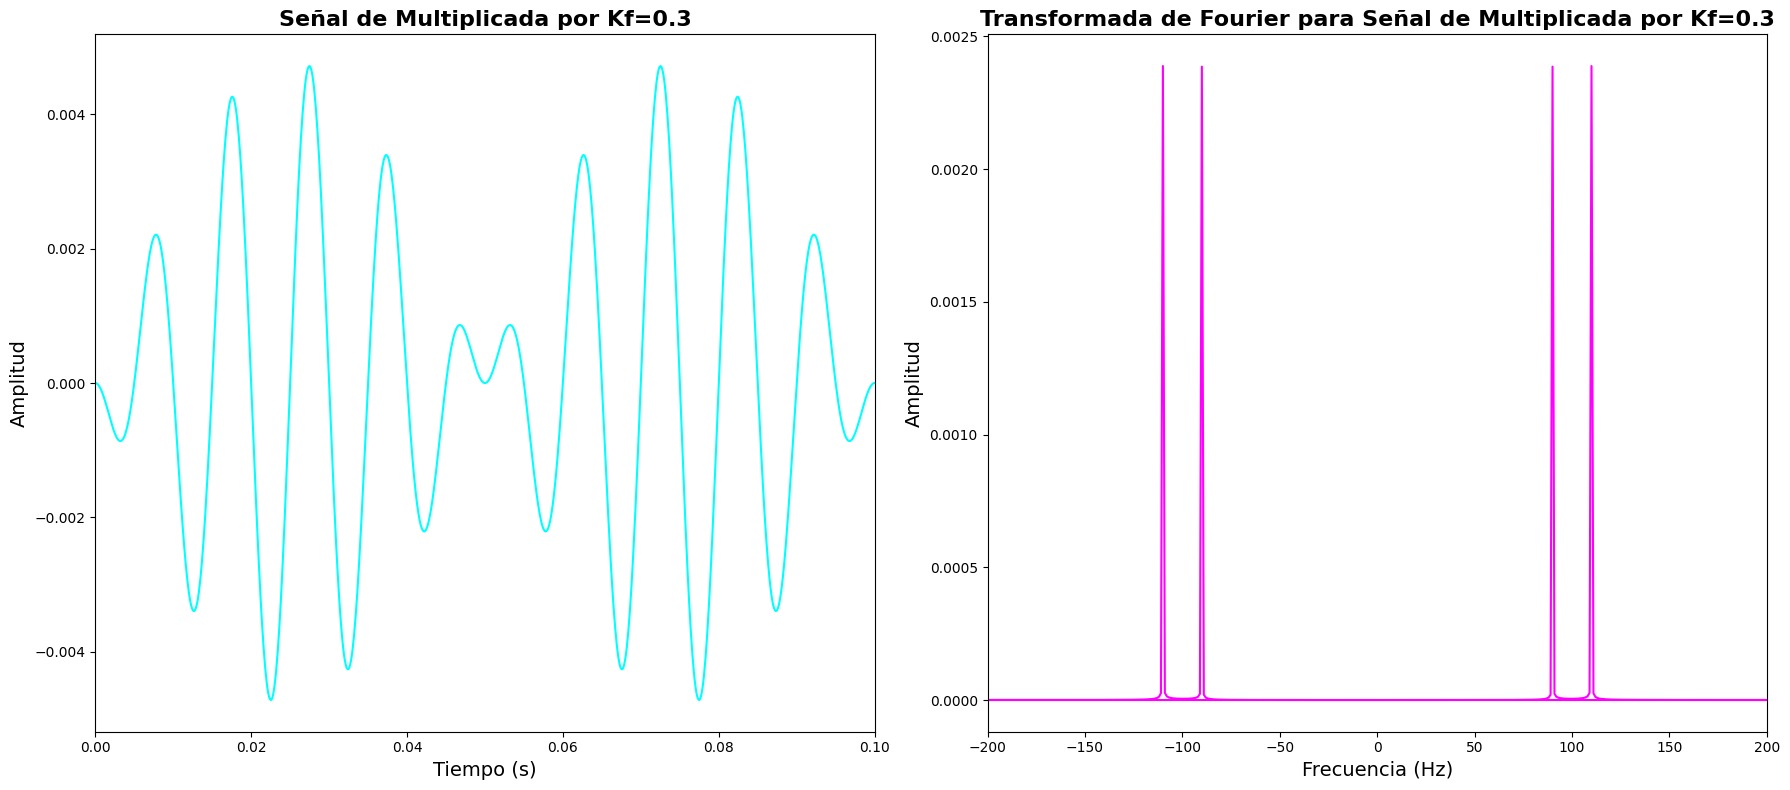

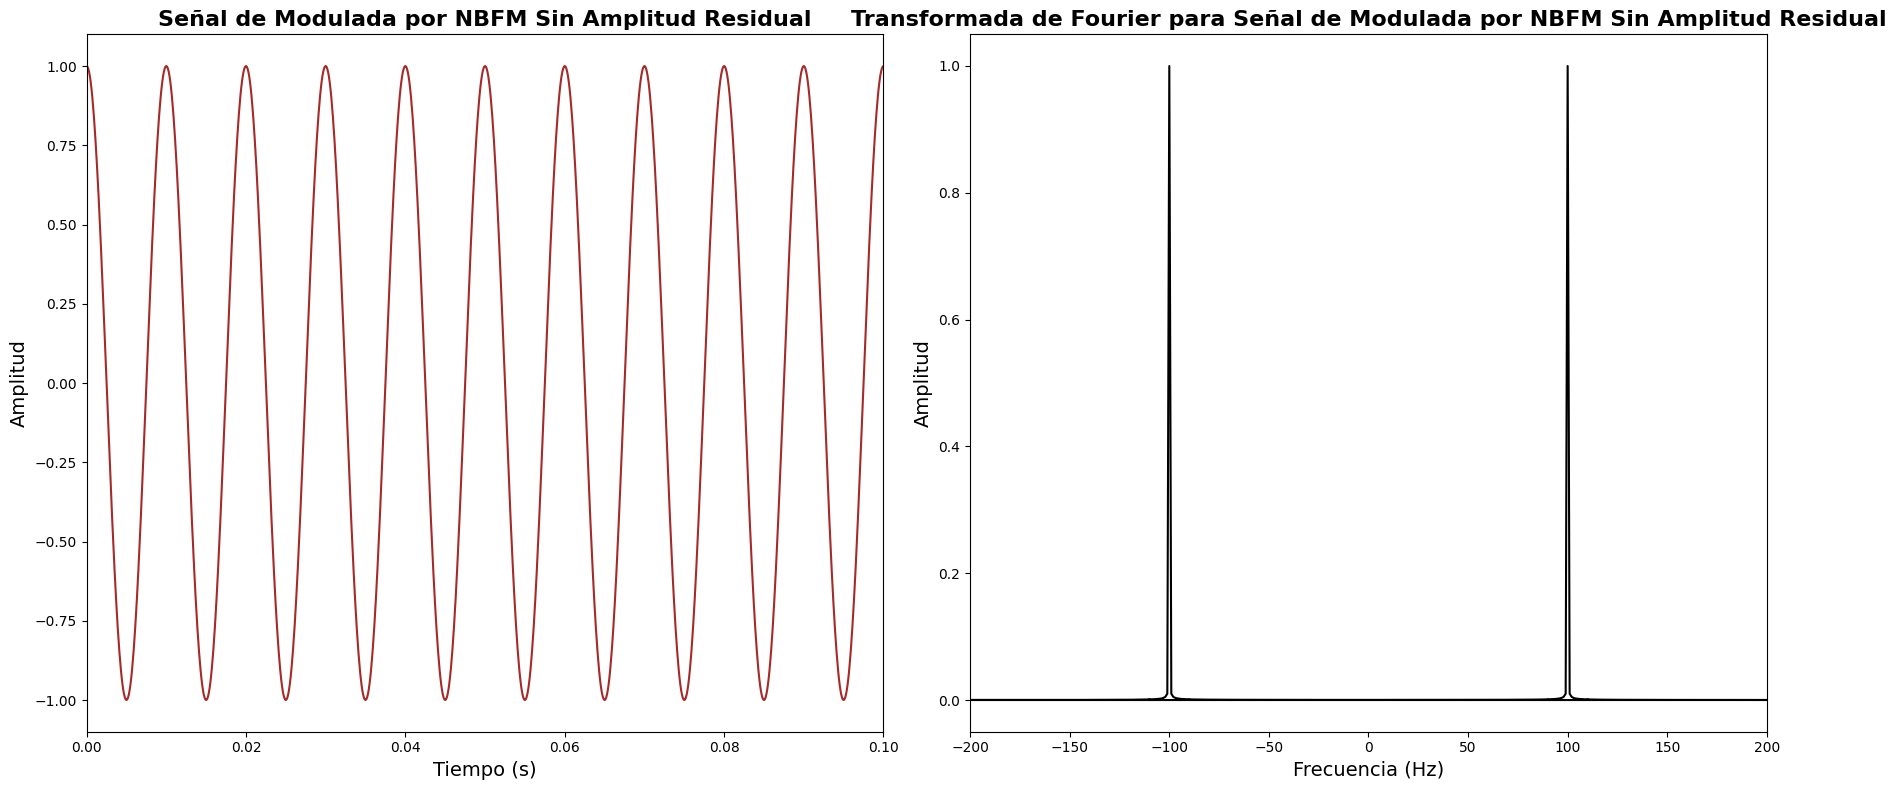

In [ ]:
# Determinación de la sensibilidad de frecuencia y modulación final

#Se define el valor de la ganancia
kf = 0.3

#Se multiplica la señal obtenida previamente por el valor de la ganancia
signal_data = kf * multiplied_block_data

#Gráfica de la señal sin los efectos de amplitud residual
plot_time_freq(t_data, signal_data, 'Tiempo (s)', 'Amplitud', 'Multiplicada por Kf=0.3', 0.1, 200, 'cyan', 'magenta')

#Definición de la señal final de la modulación NPFM
signal_nbfm_data = ct_data + signal_data #Suma de la señal portadora con la señal multiplicada previamente
plot_time_freq(t_data, signal_nbfm_data, 'Tiempo (s)', 'Amplitud', 'Modulada por NBFM Sin Amplitud Residual', 0.1, 200, 'brown', 'black')

En las gráficas anteriores se tiene primero la señal multiplicada previamente tras ser multiplicada por la ganancia $K_f$, para luego mostrar la señal modulada final del proceso.

Como se observa se regresa a la amplitud de la señal del mensaje original, cona forma senoudal, y se tiene una frecuencia de 100 Hz, que corresponde a la frecuencia de la señal portadora.

#Caso Con Amplitud Residual

Para este segundo caso, es necesario contemplar un caso donde se tenga amplitud resifual, lo cual se obtiene al no cumplir con la restricción definida previamente, es decir:

> $β=Δf/f_{m}  ≪ 0.3$ $rad$


 Por lo tanto, en este caso se va a trabajar con un índice de modulación de $β= 3$  $rad$, ya que se tendría un valor diez veces mayor al requerido.

 Para esto, es necesario que el valor de la ganancia sea de $k_{f}=30$, ya que como se indicó previamente, la frecuencia de la señal moduladora es de 10 Hz y es de amplitud unitaria.

 Seguidamente, es necesario graficar la señal obtenida luego del producto del  bloque de multiplicación con la ganancia elegida. Para finalmente, realizar la suma de dicha señal y la señal portadora para obtener la señal modulada final.

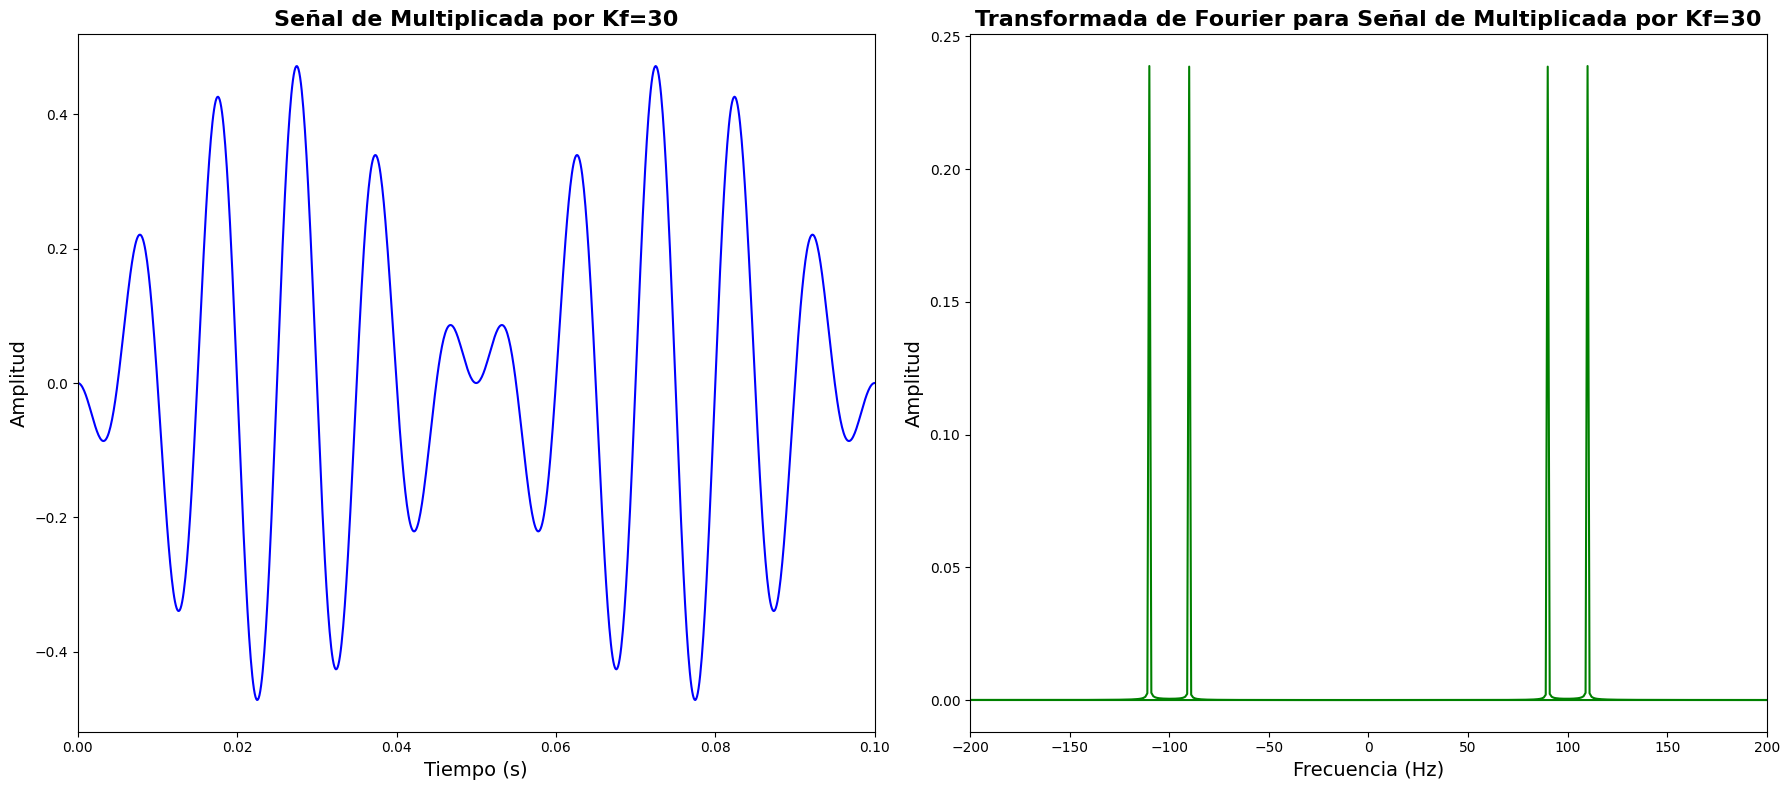

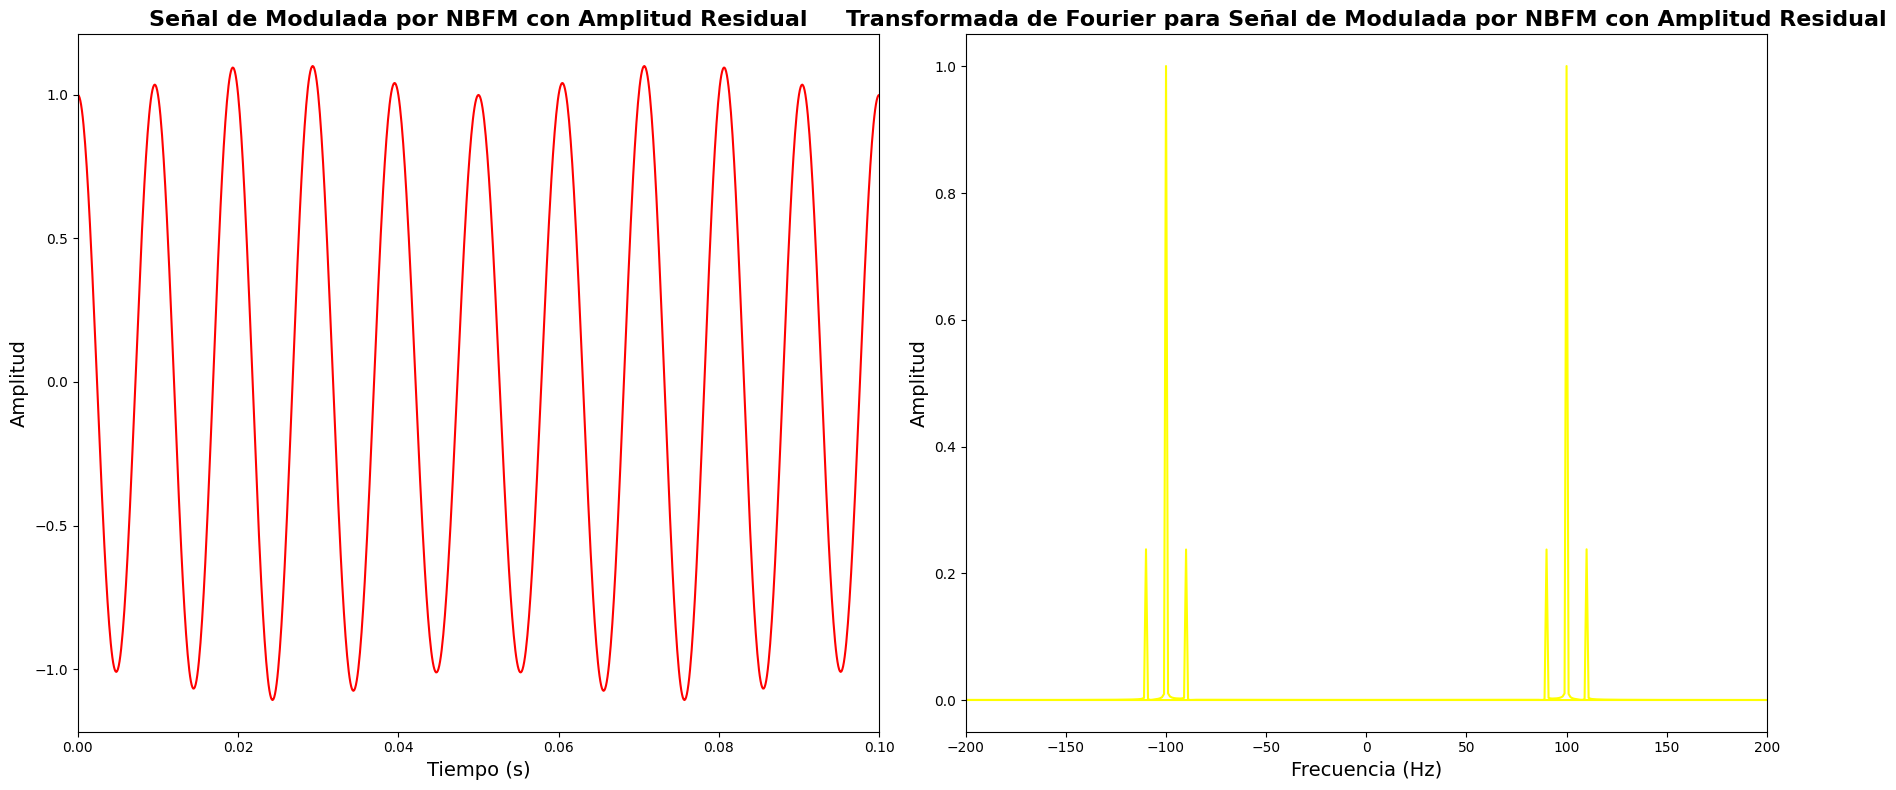

In [ ]:
#Caso con amplitud residual y modulación final

#Definición de la ganancia utilizada para obtener amplitud residual
kf_with_residual = 30

#Creación de la seal con amplitud residual
#Producto de la señal del bloque de multiplicación y la ganancia Kf
signal_with_residual_data = kf_with_residual * multiplied_block_data

#Gráficas de la señal
plot_time_freq(t_data, signal_with_residual_data, 'Tiempo (s)', 'Amplitud', 'Multiplicada por Kf=30', 0.1, 200, 'blue', 'green')

#Creación de la señal final del proceso
#Sumatoria de la señal anterior y la señal portadora
signal_nbfm_with_residual_data = ct_data + signal_with_residual_data

#Gráficas
plot_time_freq(t_data, signal_nbfm_with_residual_data, 'Tiempo (s)', 'Amplitud', 'Modulada por NBFM con Amplitud Residual', 0.1, 200, 'red', 'yellow')

Del resultado obtenido y mostrado en estas gráficas, se nota que se obtiene la envolvente de la señal modulada, tal y como era esperado.
Además, en el caso de la frecuencia se obteiene también dos picos de frecuencia adicionales, debido a la amplitud residual definida para este caso, aún así, estos valores son menores que los de la frecuencia de la señal portadora.

En el caso de la señal modulada obtenida se observa el efecto de no cumplir con el índice de modulación, ya que aunque en algunos momentos se obtiene el valor de la amplitud del mensaje original, en otros el valor es menor (inferior a 1).

# Actividad #3

1. Construya un sistema de modulación WBFM, siguiendo los lineamientos de este tipo de modulación en relación a beta y partiendo de la ecuación de señal modulada en FM: image.png.

  Para la señal de mensaje puede usar el tono clásico:

  image.png

# Solución parte 1

# Importación de librerías adicionales necesarias

In [ ]:
# Función de Bessel de segundo tipo y orden n
from scipy.special import jn
from scipy.signal import butter, lfilter

# Definición de parámetros y funciones

In [ ]:
# Definición de parámetros
fc = 30 # Frecuencia de la señal portadora
Am = 1 # Amplitud del mensaje
Ac = 1 #Amplitu de la señal portadora
samplingRate = 10000 # Frecuencia de muestreo
duration = 0.5 # Duración del vector de tiempo

# Se genera el time array
t = np.arange(0, duration, 1/samplingRate)

# Función de modulación WBFM para un tono
def ModulacionWBFM(Am, fm, Ac, fc, deltaF):
  """ Entradas: Am: amplitud del mensaje, fm: frecuencia del mensaje, Ac: amplitud
    de la señal portadora, fc: frecuencia de la señal portadora, deltaF: valor utilizado
    para el cálculo de beta.
    Salidas: m: señal moduladora (mensaje) y s: señal modulada
  """
  # Mensaje
  m = Am * np.cos(2*np.pi*fm*t)
  # Señal modulada
  s = Ac * np.cos(2* np.pi * fc * t + (deltaF/fm) * np.sin(2* np.pi * fm * t))
  return m, s

#Función para obtener el espectro en frecuencia de las señales
def TransformadaFourier(t, signal):
  """ Entradas: t: vector de tiempo, signal: señal a la que se le quiere calcular
      la transformada.
      Salidas: frequencies: vector de frecuencias, fs: valores de la transformada
  """
  frequencies = np.fft.fftfreq(len(t)) # Vector de frecuencias
  fs = np.fft.fft(signal) # Valores de la transformada
  return frequencies, fs

# Función para graficar el mensaje, la señal modulada y el espectro en frecuencia
def graficas(m, s, t, freqm, fsm, freq, fs):
  # Se grafican los resultados con matplot
  plt.figure(figsize=(8, 6))
  plt.subplot(2, 2, 1)
  plt.plot(t, m)
  # Título del gráfico
  plt.title("Mensaje")
  # Etiqueta del eje X
  plt.xlabel("Time (s))")
  # Etiqueta del eje Y
  plt.ylabel("Amplitude ")

  # Se grafican los resultados con matplot
  plt.subplot(2, 2, 2)
  plt.plot(freqm, fsm)
  # Título del gráfico
  plt.title("Espectro de frecuencia del mensaje")
  # Etiqueta del eje X
  plt.xlabel("Frequency (Hz)")
  plt.xlim(-0.25, 0.25)
  # Etiqueta del eje Y
  plt.ylabel("Amplitude ")

  # Se grafican los resultados con matplot
  plt.subplot(2, 2, 3)
  plt.plot(t, s)
  # Título del gráfico
  plt.title("Señal modulada WBFM")
  # Etiqueta del eje X
  plt.xlabel("Time (s)")
  # Etiqueta del eje Y
  plt.ylabel("Amplitude ")

  # Se grafican los resultados con matplot
  plt.subplot(2, 2, 4)
  plt.plot(freq, fs)
  # Título del gráfico
  plt.title("Señal modulada WBFM espectro de frecuencias")
  # Etiqueta del eje X
  plt.xlabel("Frequency (Hz)")
  plt.xlim(-0.25, 0.25)
  # Etiqueta del eje Y
  plt.ylabel("Amplitude ")

  plt.tight_layout()
  plt.show()
  return


# Prueba del funcionamiento de la modulación WBFM

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


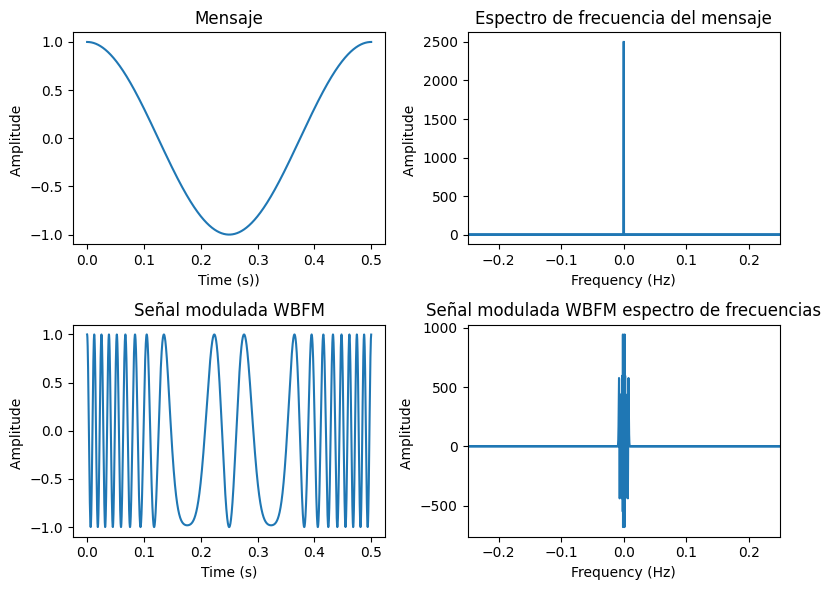

In [ ]:
# Prueba de modulación WBFM
fm = 2 # Frecuencia del mensaje
# Llamado a la función de modulación por banda ancha con DeltaF = 50
m, s = ModulacionWBFM(Am, fm, Ac, fc, 50)
# Cálculo de la transformada de Fourier para el mensaje
freqm, fsm = TransformadaFourier(t, m)
# Cálculo de la transformada de Fourier para la señal modulada
freq, fs = TransformadaFourier(t, s)
# Graficación de resultados
graficas(m, s, t, freqm, fsm, freq, fs)

2. Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝑓ₘ y manteniendo constante 𝛥f. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

# Solución parte 2

Combinación 1: 
deltaF=50, fm=2, fc=30, amplitudes=1 


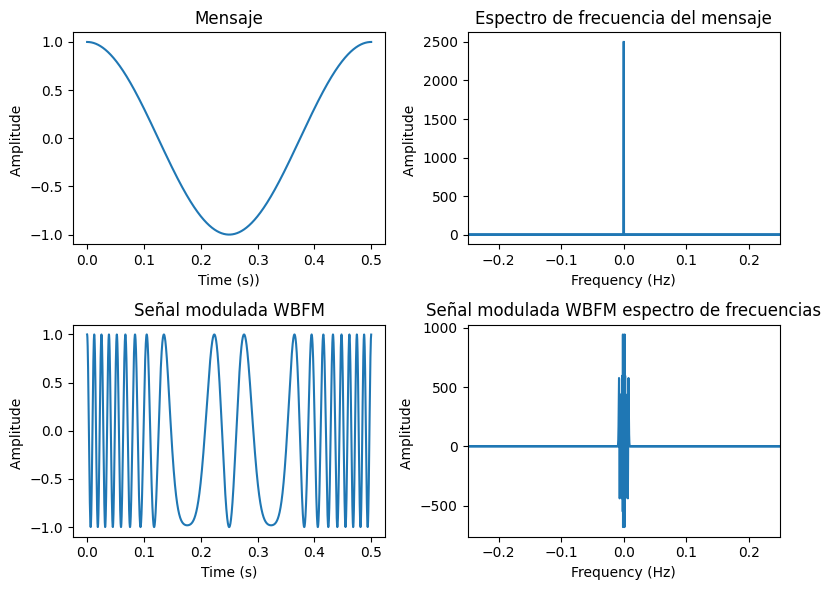

Combinación 2: 
deltaF=50, fm=6, fc=30, amplitudes=1 


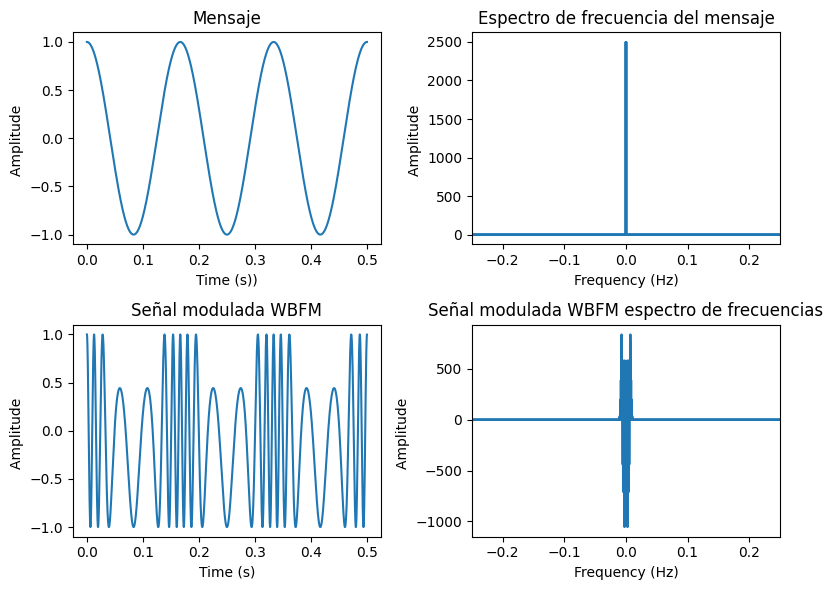

Combinación 3: 
deltaF=50, fm=8, fc=30, amplitudes=1 


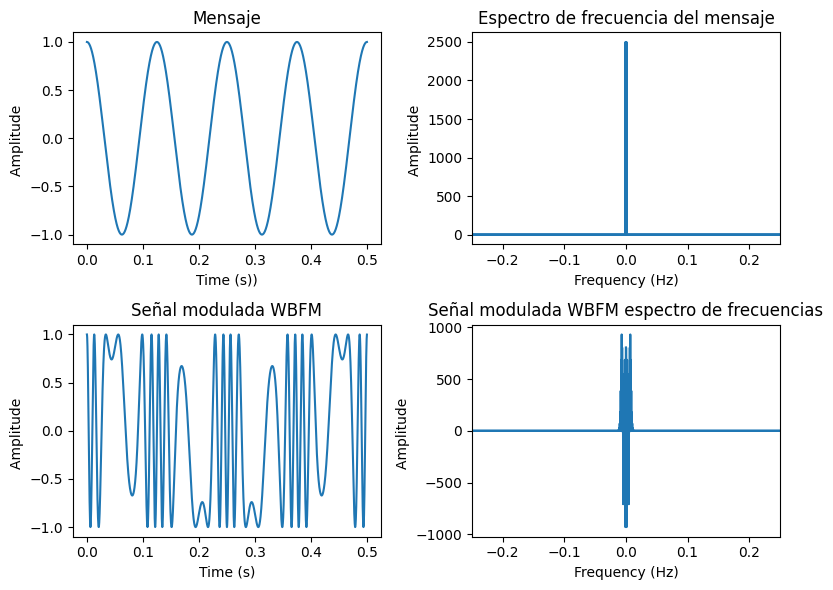

Combinación 4: 
deltaF=50, fm=10, fc=30, amplitudes=1 


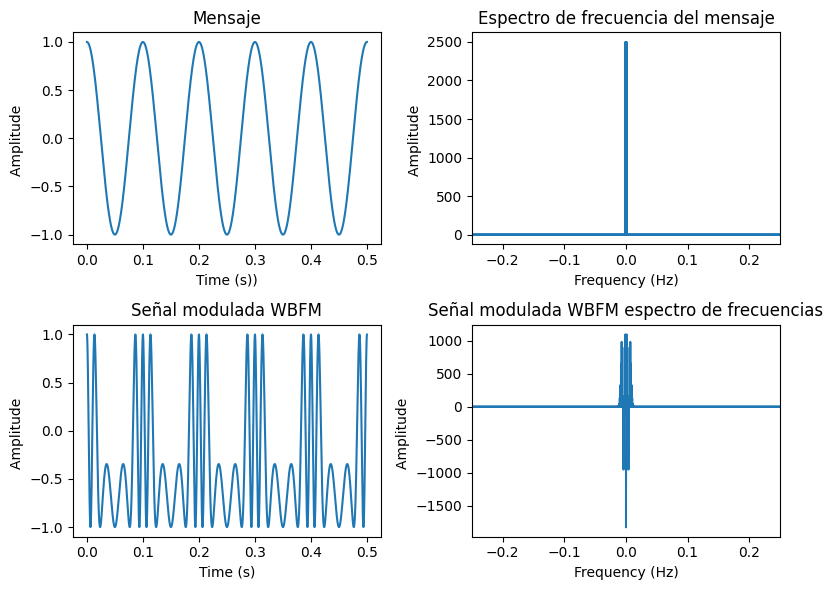

In [ ]:
# Valor de deltaF = 50
deltaF = 50

# Valores a variar:
fm1 = 2
fm2 = 6
fm3 = 8
fm4 = 10

# Llamado a la función de modulación por banda ancha con DeltaF = 50
print("Combinación 1: ")
print("deltaF=50, fm=2, fc=30, amplitudes=1 ")
m1, s1 = ModulacionWBFM(Am, fm1, Ac, fc, deltaF)
# Cálculo de la transformada de Fourier para el mensaje
freqm1, fsm1 = TransformadaFourier(t, m1)
# Cálculo de la transformada de Fourier para la señal modulada
freq1, fs1 = TransformadaFourier(t, s1)
# Graficación de resultados
graficas(m1, s1, t, freqm1, fsm1, freq1, fs1)

print("Combinación 2: ")
print("deltaF=50, fm=6, fc=30, amplitudes=1 ")
m2, s2 = ModulacionWBFM(Am, fm2, Ac, fc, deltaF)
# Cálculo de la transformada de Fourier para el mensaje
freqm2, fsm2 = TransformadaFourier(t, m2)
# Cálculo de la transformada de Fourier para la señal modulada
freq2, fs2 = TransformadaFourier(t, s2)
# Graficación de resultados
graficas(m2, s2, t, freqm2, fsm2, freq2, fs2)

print("Combinación 3: ")
print("deltaF=50, fm=8, fc=30, amplitudes=1 ")
m3, s3 = ModulacionWBFM(Am, fm3, Ac, fc, deltaF)
# Cálculo de la transformada de Fourier para el mensaje
freqm3, fsm3 = TransformadaFourier(t, m3)
# Cálculo de la transformada de Fourier para la señal modulada
freq3, fs3 = TransformadaFourier(t, s3)
# Graficación de resultados
graficas(m3, s3, t, freqm3, fsm3, freq3, fs3)

print("Combinación 4: ")
print("deltaF=50, fm=10, fc=30, amplitudes=1 ")
m4, s4 = ModulacionWBFM(Am, fm4, Ac, fc, deltaF)
# Cálculo de la transformada de Fourier para el mensaje
freqm4, fsm4 = TransformadaFourier(t, m4)
# Cálculo de la transformada de Fourier para la señal modulada
freq4, fs4 = TransformadaFourier(t, s4)
# Graficación de resultados
graficas(m4, s4, t, freqm4, fsm4, freq4, fs4)



# Análisis de los resultados obtenidos en la parte 2

A partir de los resultados anteriores, se puede notar que conforme se va incrementando el valor de fm se generan comportamientos extraños en ciertas partes de la amplitud de la señal modulada. Específicamente se da una reducción de la amplitud, lo cual es un efecto indeseable en la modulación por frecuencia. La razón de este efecto es que al variar la frecuencia fm, se está modificando el valor de β de la ecuación de modulación; es decir, al aumentar el valor de fm, se reduce el valor de β. Para el caso de la modulación realizada, se puede notar que los mejores resultados son con la frecuencia fm pequeña, es decir con β grande. Esto concuerda con la teoría estudiada, ya que este es el comportamiento que debe seguir un modulador de banda ancha.



3. Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝛥f y manteniendo 𝑓ₘ constante. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

# Solución parte 3

Combinación 1: 
deltaF=15, fm=2, fc=30, amplitudes=1 


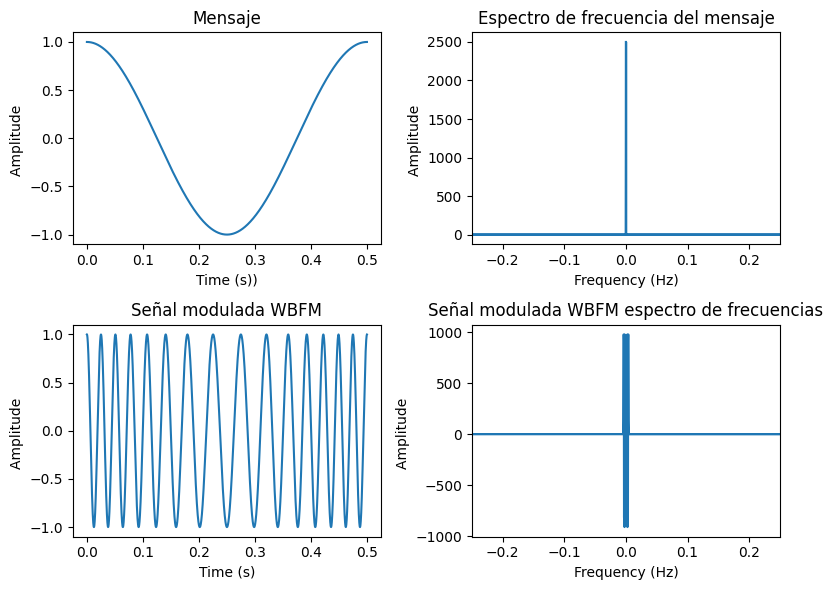

Combinación 2: 
deltaF=25, fm=2, fc=30, amplitudes=1 


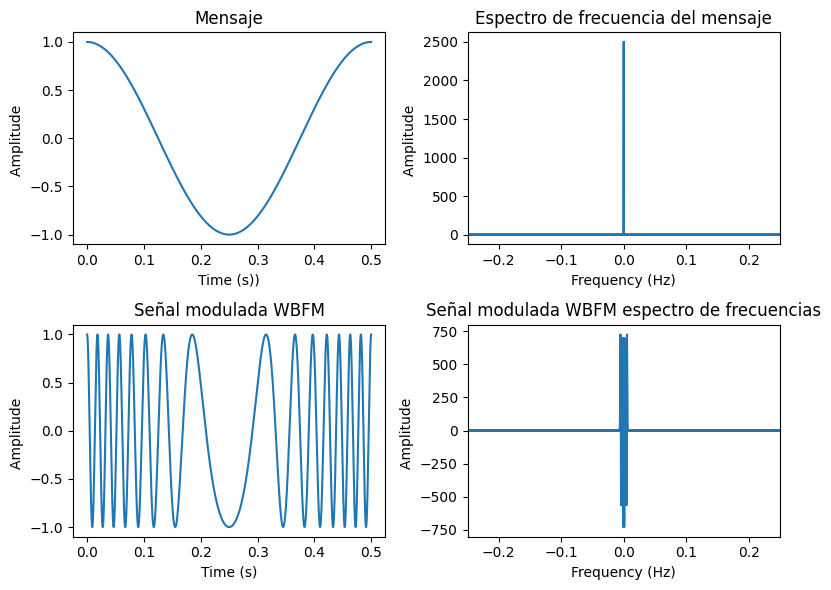

Combinación 3: 
deltaF=50, fm=2, fc=30, amplitudes=1 


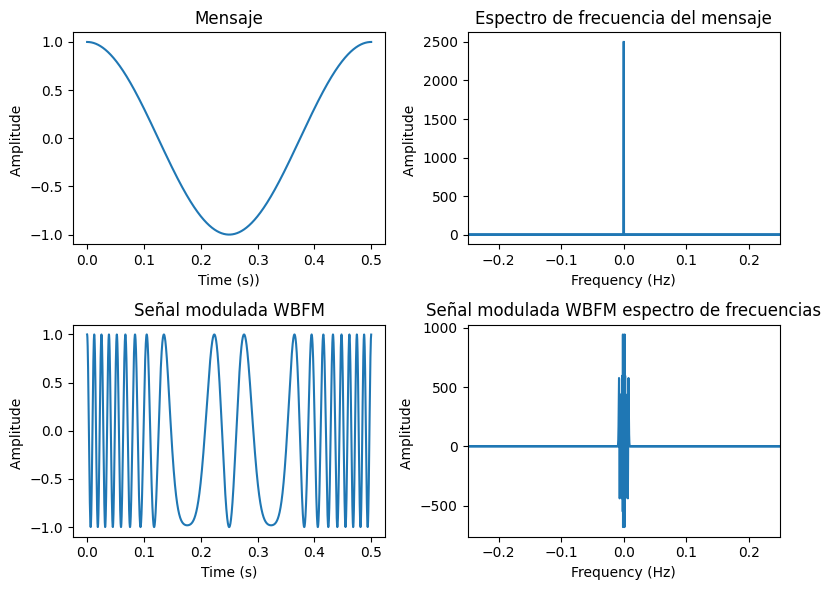

Combinación 4: 
deltaF=100, fm=2, fc=30, amplitudes=1 


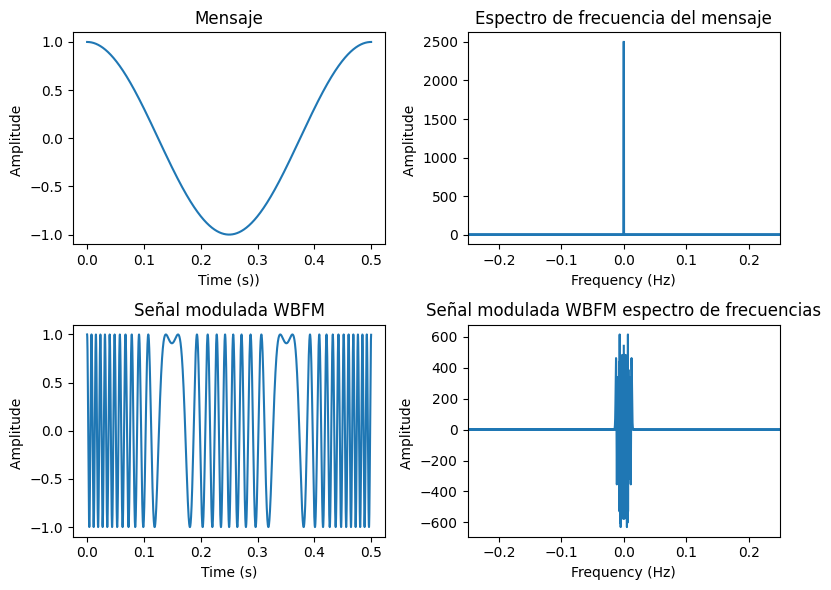

In [ ]:
# Valor de fm = 2
fm1 = 2

# Valores a variar:
deltaF1 = 10
deltaF2 = 25
deltaF3 = 50
deltaF4 = 100

# Llamado a la función de modulación por banda ancha con DeltaF = 50
print("Combinación 1: ")
print("deltaF=15, fm=2, fc=30, amplitudes=1 ")
m5, s5 = ModulacionWBFM(Am, fm1, Ac, fc, deltaF1)
# Cálculo de la transformada de Fourier para el mensaje
freqm5, fsm5 = TransformadaFourier(t, m5)
# Cálculo de la transformada de Fourier para la señal modulada
freq5, fs5 = TransformadaFourier(t, s5)
# Graficación de resultados
graficas(m5, s5, t, freqm5, fsm5, freq5, fs5)

print("Combinación 2: ")
print("deltaF=25, fm=2, fc=30, amplitudes=1 ")
m6, s6 = ModulacionWBFM(Am, fm1, Ac, fc, deltaF2)
# Cálculo de la transformada de Fourier para el mensaje
freqm6, fsm6 = TransformadaFourier(t, m6)
# Cálculo de la transformada de Fourier para la señal modulada
freq6, fs6 = TransformadaFourier(t, s6)
# Graficación de resultados
graficas(m6, s6, t, freqm6, fsm6, freq6, fs6)

print("Combinación 3: ")
print("deltaF=50, fm=2, fc=30, amplitudes=1 ")
m7, s7 = ModulacionWBFM(Am, fm1, Ac, fc, deltaF3)
# Cálculo de la transformada de Fourier para el mensaje
freqm7, fsm7 = TransformadaFourier(t, m7)
# Cálculo de la transformada de Fourier para la señal modulada
freq7, fs7 = TransformadaFourier(t, s7)
# Graficación de resultados
graficas(m7, s7, t, freqm7, fsm7, freq7, fs7)

print("Combinación 4: ")
print("deltaF=100, fm=2, fc=30, amplitudes=1 ")
m8, s8 = ModulacionWBFM(Am, fm1, Ac, fc, deltaF4)
# Cálculo de la transformada de Fourier para el mensaje
freqm8, fsm8 = TransformadaFourier(t, m8)
# Cálculo de la transformada de Fourier para la señal modulada
freq8, fs8 = TransformadaFourier(t, s8)
# Graficación de resultados
graficas(m8, s8, t, freqm8, fsm8, freq8, fs8)

# Análisis de los resultados de la parte 3

Ahora, para este caso se puede notar cómo cuando Δf tiene valores pequeños la señal modulada tiene un comportamiento prácticamente igual al de la señal portadora. Es decir, las variaciones en la frcuencia son muy pocas. Se puede notar como al incrementar el Δf los resultados mejoran, es decir, se nota que la modulación sí genera cambios en la frecuencia de la portadora y por tanto, que el mensaje se envía de mejor manera. Esto concuerda con el caso anterior, ya que al incrementar Δf se está incrementando también β. Sin embargo, cabe resaltar que esto no es algo propocional, es decir que cuanto más grande sea β, mejor es la modulación. Este comportamiento más bien va a depender de la aplicación que se tenga, pues tal como se aprecia en el caso 4, al incrementar Δf a 100Hz, se generan unos cambios también en la fase de la señal que pueden ser indeseados, pero que están estrechamente relacionados con el tipo de modulación realizada.

4. Escoja un valor de beta pequeño, como los usados en NBFM, grafique las curvas de frecuencia y verifique que se obtengan los resultados esperados, y realice un análisis completo de los resultados obtenidos.

# Solución parte 4

Con un valor de Beta pequeño: 
deltaF=0.1, fm=1, fc=30, amplitudes=1 


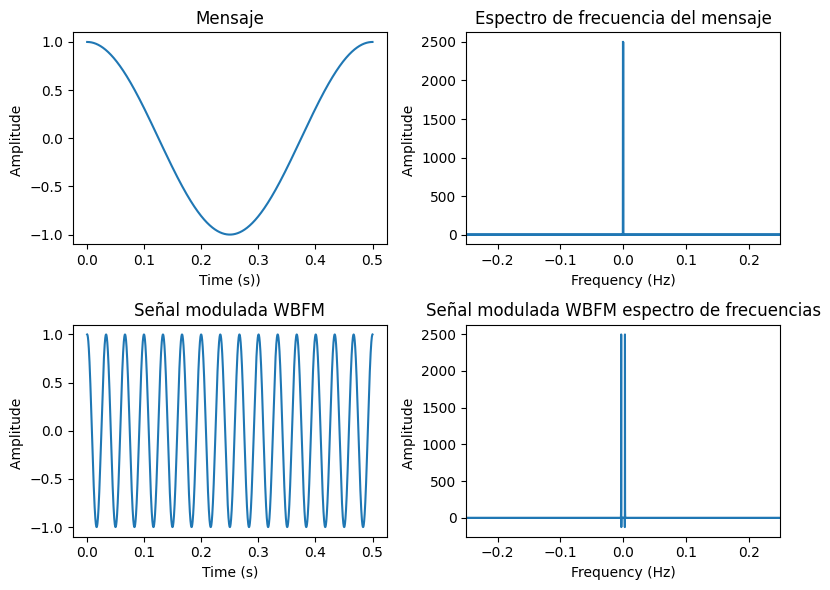

In [ ]:
# Llamado a la función de modulación por banda ancha con DeltaF = 50
print("Con un valor de Beta pequeño: ")
print("deltaF=0.1, fm=1, fc=30, amplitudes=1 ")
m9, s9 = ModulacionWBFM(Am, 2, Ac, fc, 0.2)
# Cálculo de la transformada de Fourier para el mensaje
freqm9, fsm9 = TransformadaFourier(t, m9)
# Cálculo de la transformada de Fourier para la señal modulada
freq9, fs9 = TransformadaFourier(t, s9)
# Graficación de resultados
graficas(m9, s9, t, freqm9, fsm9, freq9, fs9)

# Análisis de los resultados de la parte 4

En esta parte, se puede notar que al seleccionar un valor de β similar al de la modulación de banda angosta (0.1), la señal obtenida en la modulación es igual a la señal portadora, es decir, no hay ninguna información sobre el mensaje original. Por lo tanto, se puede concluir que un valor de β muy pequeño para el caso de la modulación WBFM hace que no haya modulación y que el mensaje no sea recuperable.

5. Diseñe una rutina en la que obtenga las curvas de la función de Bessel.

# Solución parte 5

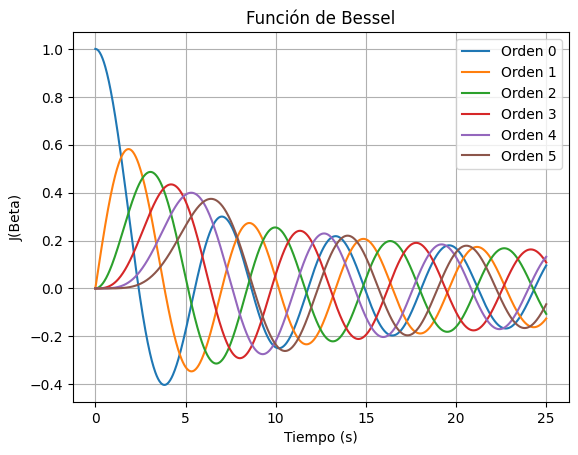

In [ ]:
def plot_bessel_function(order, t):
    B = jn(order, t)  # Calcula la función de Bessel de primer tipo y orden n

    plt.plot(t, B, label=f'Orden {order}')
    plt.legend()

t1 = np.linspace(0, 25, 1000)
for n in range (0, 6):
  plot_bessel_function(n, t1)

plt.title(f'Función de Bessel')
plt.xlabel('Tiempo (s)')
plt.ylabel(f'J(Beta)')
plt.grid(True)
plt.show()


# Modulación de Pulsos (parte B)

# Actividad #1
Construya un sistema de modulación por muestreo de pulsos (PAM), el cual debe
tener las siguientes características:

a. El usuario debe escoger el tipo de señal a muestrear, puede ser entre tres
opciones: una señal senoidal, una cuadrada y una triangular. Estas señales ya
deben tener una frecuencia pre-establecida cuyo valor debe ser elegido de
acuerdo al requerimiento b).

b. El usuario debe escoger adicionalmente la frecuencia de muestreo, se deben
recomendar 3 opciones que permitan visualizar el efecto de un muestreo apropiado, un sobre-muestreo y un sub-muestreo.

c. Para el pulso, se debe poder seleccionar el ancho del pulso, de igual forma, para tres casos: un pulso angosto, uno de mediana angostura y otro ancho. Los valores deben ser tales que, para el caso de una tasa de muestreo apropiada, permitan visualizar los efectos del ancho del pulso en la señal resultante muestreada.

d. Como resultado se debe de mostrar la señal en frecuencia resultante del
muestreo, de manera que se puedan visualizar los efectos de un muestreo
apropiado, un sobre-muestreo y un sub-muestreo. Con los posibles anchos de
pulsos.

e. Una vez obtenido el espectro de la señal muestreada, aplique solamente un filtro para recuperar la señal original, y reconstrúyala.
Elabore un análisis de los resultados obtenidos para las diferentes combinaciones.

# Solución

# Importación de librerías adicionales y definición de parámetros
A continuación, se importan las librerías adicionales necesarias y se definen los parámetros para generar la señal moduladora, la señal portadora y el tren de pulsos.


In [ ]:
# Importación de librerías adicionales
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth, butter, sosfilt

# Definición de parámetros necesarios para las señales en el tiempo y frecuencia
frecMuestreo = 200000  # frecuencia de muestreo (Hz)
duracion = 1  # duración de las señales (s)
muestras = frecMuestreo * duracion  # número de muestras
pMuestreo = 1/frecMuestreo  # periodo de muestreo (s)


# Parámetros de frecuencia y amplitud del mensaje y la portdora
fm = 100  # Frecuencia del mensaje (Hz)
fc = 5000 # Frecuencia de la portadora (Hz)
Am = 1  # Amplitud del mensaje
Ac = 1  # Amplitud de la portadora

# Vector de tiempo
t = np.linspace(0, duracion, muestras)

# Vector de frecuencias
frecs = fftfreq(muestras, pMuestreo)

# Parámetros para generar el tren de pulsos y la modulación PAM
# Cantidad de pulsos en el tren de pulsos
Npulsos = fc * duracion
# Vector de muestreo para tren de pulsos
x = np.linspace(0, muestras, Npulsos, endpoint=False)


# Definición de funciones

In [ ]:
def graficarSenal(senal, titulo, tmax, fmax):
  # Funcionalidad: Grafica una señal y su respectiva transformada de fourier
  # Entradas: vector del tiempo, vector de la señal y título del gráfico (string)
  # Salidas: N/A

  # Se obtiene la transformada de la señal y se normaliza
  espectro = fft(senal)/muestras

  # Creación del gráfico
  fig, ax = plt.subplots(1, 2, figsize=(8, 2), layout='constrained')
  fig.suptitle(titulo, size=16)

  plt.subplot(1, 2, 1)
  plt.plot(t, senal)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Amplitud')
  plt.xlim(0, tmax)

  plt.subplot(1, 2, 2)
  plt.plot(frecs, np.abs(espectro), 'r')
  plt.xlabel('Frecuencia (Hz)')
  plt.ylabel('Magnitud')
  plt.xlim(-fmax, fmax)

  plt.show()


def generadorSenal(opcion):
  """
  Funcionalidad: Genera la señal de mensaje de acuerdo con la opción escogida por el usuario
  Entradas: opcion (de tipo entero)
  Salida: senal (array)
  """
  if opcion == 1:
    # Opción 1 es una señal senoidal
    senal = Am * np.sin(2*np.pi*fm*t)
  elif opcion == 2:
    # Opción 2 es una señal cuadrada
    senal = Am * square(2*np.pi*fm*t)
  elif opcion == 3:
    # Opción 3 es una señal triangular
    senal = Am * sawtooth(2*np.pi*fm*t, width=0.5)
  return senal

def generar_tren_pulsos(opcion):
  """
  Funcionalidad: Genera el tren de pulsos para la modulación de acuerdo
  con la opción seleccionada por el usuario
  Entradas: opcion (de tipo entero)
  Salida: pulsos (array)
  """
  if opcion == 1:
    # Opción 1 es un pulso angosto
    pulsos = Ac/2 * (square(2*np.pi*fc*t, duty=0.1) + 1)
  elif opcion == 2:
    # Opción 2 es una un pulso intermedio
    pulsos = Ac/2 * (square(2*np.pi*fc*t, duty=0.2) + 1)
  elif opcion == 3:
    # Opción 3 es un pulso ancho
    pulsos = Ac/2 * (square(2*np.pi*fc*t, duty=0.5) + 1)
  return pulsos

# Selección del tipo de onda a modular y el tren de pulsos

Tipos de señal:
   1. Senoidal
   2. Cuadrada
   3. Triangular
Seleccione un tipo de señal ingresando un número del 1 al 3: 1


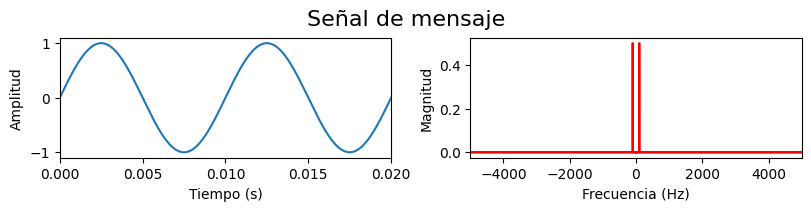

Opciones de ancho de pulso:
   1. Delgado
   2. Intermedio
   3. Ancho
Seleccione una opción de ancho de pulso con números del 1 al 3: 2


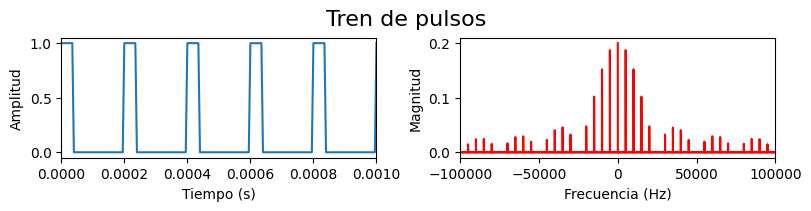

In [ ]:
# Mensaje
# Se muestran las opciones del tipo de señal
print("Tipos de señal:")
print("   1. Senoidal")
print("   2. Cuadrada")
print("   3. Triangular")

# Se solicita el tipo de señal deseado
while True:
  opcionSenal = input("Seleccione un tipo de señal ingresando un número del 1 al 3: ")
  if opcionSenal in ['1', '2', '3']:
    opcionSenal = int(opcionSenal)
    break
  else:
    print("Opción inválida, intente nuevamente")

# Se genera el mensaje y se grafica
senal = generadorSenal(opcionSenal)
graficarSenal(senal, "Señal de mensaje", 0.02, 5000)

# Tren de pulsos
# Se muestran las opciones del ancho de pulso
print("Opciones de ancho de pulso:")
print("   1. Delgado")
print("   2. Intermedio")
print("   3. Ancho")


# Se solicita el ancho de pulso deseado
while True:
  opcionPulso = input("Seleccione una opción de ancho de pulso con números del 1 al 3: ")
  if opcionPulso in ['1', '2', '3']:
    opcionPulso = int(opcionPulso)
    break
  else:
    print("Opción ingresada inválida, intente nuevamente")
# Se genera el tren de pulsos y de grafica
tren_pulsos = generar_tren_pulsos(opcionPulso)
graficarSenal(tren_pulsos, "Tren de pulsos", 0.001, 100000)

# Modulación PAM

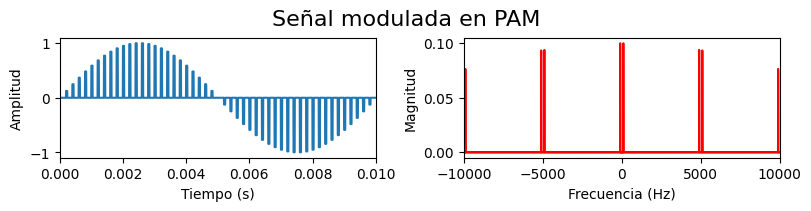

In [ ]:
# Array para la señal modulada en PAM
pam = np.copy(tren_pulsos)
pam = np.reshape(pam, (Npulsos, -1))

# Ciclo for que realiza la modulación (cambia la magnitud de los pulsos)
for i in range(Npulsos):
  pam[i] = senal[int(x[i])] * pam[i]

# Se convierte el vector pam a unidireccional
pam = np.ravel(pam)

# Se grafican los resultados
graficarSenal(pam, "Señal modulada en PAM", 0.01, 10000)  # se grafica la señal modulada resultante

# Demodulación de la señal

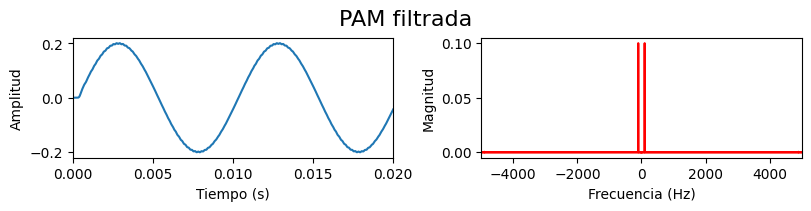

In [ ]:
# Filtrado de la señal
orden = 8  # orden del filtro
frec_corte = 2500  # frecuencia de corte (Hz)

# Filtro pasabajas
sos = butter(orden, frec_corte, 'lowpass', fs=frecMuestreo, output='sos')
pam_filt = sosfilt(sos, pam)

# Resultado
graficarSenal(pam_filt, "PAM filtrada", 0.02, 5000)  # se grafica el resultado


# Análisis de los resultados obtenidos

Senoidal con pulsos pequeños:

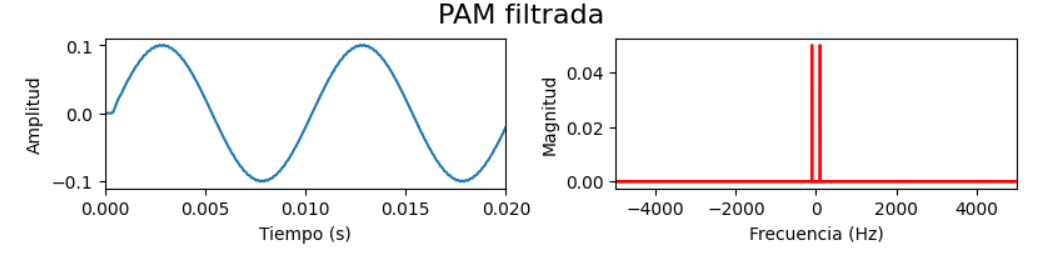


Senoidal con pulsos intermedios

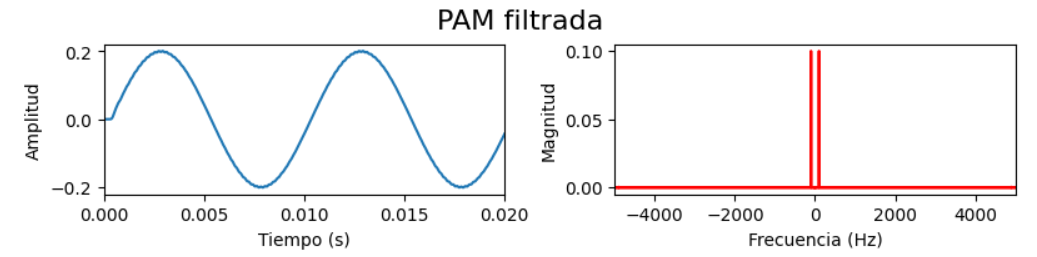

Senoidal con pulsos anchos

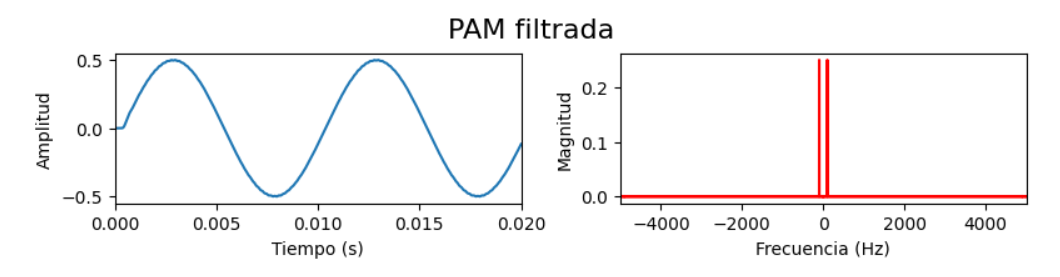

En este caso, se muestran las 3 condiciones de pulsos para la modulación PAM de una señal senoidal. Lo primero que se puede notar es que cuando el ancho de pulso es muy angosto (resultado de la primer figura), a la hora de realizar la demodulación (filtrado), se pierde mucha información.Caso contrario, cuando el tren de pulsos es muy delgado, la señal resultante (demodulada) tiene una atenuación muy significativa en su amplitud en comparación con la señal original (mensaje), no obstante su forma es similar a la original. Por otro lado, al incrementar el ancho de pulso del tren de pulsos para modular, la señal igualmente tiene una ateniación, pero no es tan sinificativa como la primera, es de aproximadamente la mitad. La razón de este efecto es porque el ancho de banda de la modulación es inversamente proporcional al ancho de pulso, es decir, un pulso muy delgado genera un ancho de banda muy grande y por tanto es más sensible al ruido  y es por esto que al filtrar la señal esta pierde más información. Por otro lado, cuando el ancho de pulso es grande, se tiene un ancho de banda pequeño y al filtrarlo se pierde menos información. No osbatente, es importante recalcar que cuando se tiene un ancho de pulso muy grande se necesitan más muestras para recuperar la señal y por ende el tiempo de precesado y postprocesado en la vida real puede ser mayor, ya que se trabaja con un gran número de muestras; mientras que si se trabaja con un ancho de pulso muy pequeño, se procesas menos muestras y por ende es más rápido, pero puede verse afectado por significativamente por el ruido. En este caso, no existe ruido por se una simulación, pero en la vida real, esto puede afectar significativamente la señal y hacer que sea imposible de recuperar. Entonces, por lo general se trata de buscar un punto intermedio donde se utilice el número de muestras adecuado para poder recuperar el mensaje aunque haya un nivel de ruido y que no requiera tanto tiempo de procesado.



#Actividad # 2
- Para una señal de entrada:

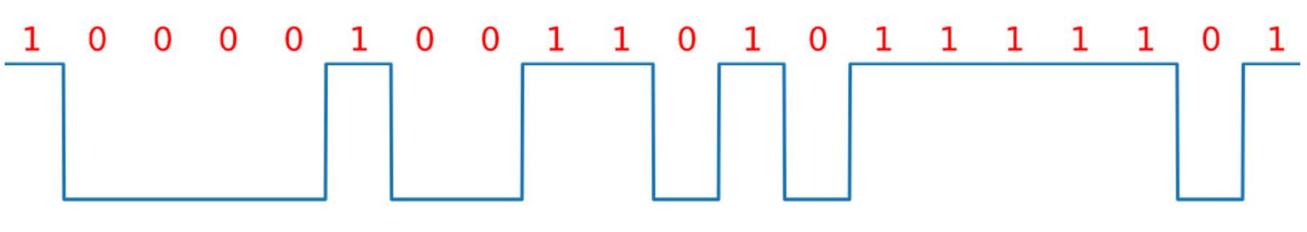
Represente los esquemas de ASK, FSK, y PSK, para la señal de entrada indicada, debe colocar las curvas de manera tal que se puedan visualizar en una misma figura, para un total de 5 graficas, la señal de entrada, la señal moduladora (senoidal) y las 3 señales ASK, FSK y PSK.

# Solución

Para resolver este problema, se realizará un código que realice la simulación de la modulación de una señal digital utilizando 3 técnicas diferentes: Amplitud de Desplazamiento de Frecuencia (ASK), Frecuencia de Desplazamiento de Frecuencia (FSK) y Fase de Desplazamiento de Frecuencia (PSK).

Pasos:

1. Definición de variables: Se establece el tiempo inicial, final y la resolución de muestreo para definir el eje de tiempo. En este caso se trabaja con 3 ms.

2. Señal digital de entrada: Se define la secuencia de bits que representa la señal digital que se desea modular, utilizando la señal mostrada en el enunciado.

3. Función para crear una señal coseno: Se define una función llamada crear_cos que genera una señal coseno con una frecuencia y amplitud dadas.

4. Señal moduladora (portadora): Se genera una señal coseno que actúa como portadora para la modulación. Para esta se define una frecuencia de 5000 Hz.

5. Señales moduladas: Se modula la señal digital de entrada utilizando las técnicas ASK, PSK y FSK, multiplicando la señal digital por la señal moduladora adecuada.

6. Impresión de las gráficas: Se realiza una función llamada plot_signals para mostrar gráficamente las señales con distintos colores.

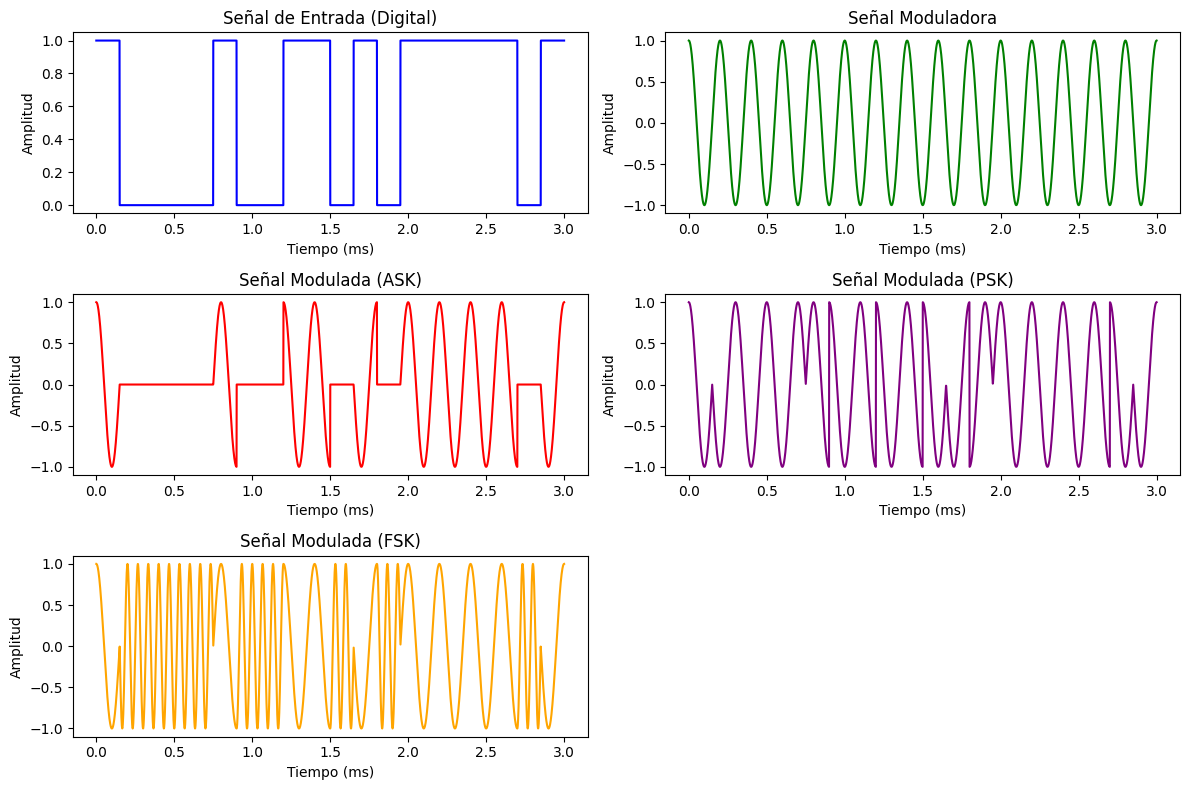

In [ ]:
def crear_cos(tiempo, amplitud=1, freq=1000, fase=0):
    cos = amplitud * np.cos(2 * np.pi * freq * tiempo)
    return cos

def plot_signals(time_axis, signals, titles, colors):
    plt.figure(figsize=(12, 8))
    for i in range(len(signals)):
        plt.subplot(3, 2, i+1)
        plt.plot(time_axis, signals[i], color=colors[i])
        plt.title(titles[i])
        plt.xlabel('Tiempo (ms)')
        plt.ylabel('Amplitud')
    plt.tight_layout()
    plt.show()

# Definición de variables
start_time = 0
end_time = 0.003
res = 0.001
tiempo = np.linspace(start_time, end_time, int(1000 * (end_time - start_time) / res))
time_axis = np.linspace(start_time * 1000, end_time * 1000, int(1000 * (end_time - start_time) / res))

# Señal digital de entrada
dig_signal = [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]

# Señal moduladora (portadora)
carrier_signal = crear_cos(tiempo, amplitud=1, freq=5000)

# Señal digital
digital_signal = np.zeros(len(tiempo))
for i in range(len(dig_signal)):
    digital_signal[int(len(digital_signal) * i / len(dig_signal)):int(len(digital_signal) * (i + 1) / len(dig_signal))] = dig_signal[i]

# Señales moduladas
modulated_signal_ASK = digital_signal * carrier_signal  # ASK
modulated_signal_PSK = digital_signal * carrier_signal - carrier_signal * (1 - digital_signal)  # PSK
modulated_signal_FSK = digital_signal * carrier_signal + crear_cos(tiempo, amplitud=1, freq=15000) * (1 - digital_signal)  # FSK

# Llamar a la función para graficar
plot_signals(time_axis, [digital_signal, carrier_signal, modulated_signal_ASK, modulated_signal_PSK, modulated_signal_FSK],
             ['Señal de Entrada (Digital)', 'Señal Moduladora', 'Señal Modulada (ASK)', 'Señal Modulada (PSK)', 'Señal Modulada (FSK)'],
             ['blue', 'green', 'red', 'purple', 'orange'])


**Resultados:**
* **Señal de Entrada (Digital):** Esta gráfica muestra la secuencia de bits de la señal digital de entrada. Los bits se representan mediante niveles de amplitud, donde el bit 1 está representado por una amplitud alta y el bit 0 por una amplitud baja. Esta gráfica contiene la señal moduladora. En este caso, es una señal coseno con una frecuencia de 5000 Hz, con amplitud constante.

* **Señal Modulada (ASK):** En esta gráfica se representa la señal modulada utilizando la técnica ASK (Amplitude Shift Keying). La modulación ASK varía la amplitud de la señal portadora de acuerdo con los bits de la señal digital de entrada. Cuando el bit es 1, la amplitud de la señal modulada es alta, y cuando el bit es 0, la amplitud es baja.

* **Señal Modulada (PSK):** Con PSK (Phase Shift Keying) se varía la fase de la señal portadora según los bits de la señal digital de entrada. En este caso, se produce un cambio de fase de 180 grados cuando el bit cambia de 0 a 1.

* **Señal Modulada (FSK):** En FSK, la frecuencia de la señal portadora cambia de acuerdo con los bits de la señal digital de entrada. Aquí, cuando el bit es 1, la frecuencia de la señal modulada es de 15000 Hz, y cuando el bit es 0, la frecuencia es de 5000 Hz.

# Actividad # 3
Investigue sobre alguna librería que le permita llevar a cabo de la manera más
eficiente y automática, la anterior (Actividad # 2). Esto es, investigar sobre alguna librería de Python que lo haga más directamente.


#Solución

En la universidad Vivekananda College of Engineering & Technology, Puttur (India), el departamento de electrónica y comunicación generó una librería de Python con el objetivo de ayudarle a los estudiantes a realizar experimentos fáciles y básicos en temas como la modulación y demodulación. En este caso, se utiliza el módulo DCOM de la librería, el cual incluye funciones como: amplitude shift keying (ASK), frequency shift keying (FSK), phase shift keying (PSK), differential phase shift keying (DPSK), quadrature phase shift keying (QPSK), modulación de amplitud en cuadratura M-aria (por ejemplo, 16-QAM) y multiplexación por división de tiempo (TDM). Finalmente, para instalar la librería se escribe el siguiente comando en la ventana de Windows: pip install vcetdspdcom.

Comandos para generar una modulación de tipo ASK:

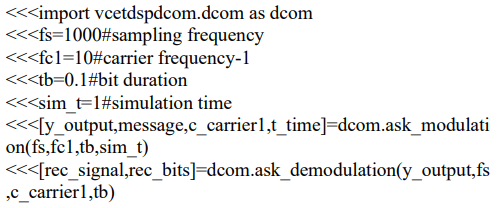

Recuperado de:

[1] Shivaprasad, 2022, VCETDSPDCOM: A Open-Source Python Package to Simulate Signal Processing Algorithms and Design Communication Modulation and Demodulation Schemes, INTERNATIONAL JOURNAL OF ENGINEERING RESEARCH & TECHNOLOGY (IJERT) Volume 11, Issue 08 (August 2022).

Enlace:

https://www.ijert.org/research/vcetdspdcom-a-open-source-python-package-to-simulate-signal-processing-algorithms-and-design-communication-modulation-and-demodulation-schemes-IJERTV11IS080124.pdf

